<a href="https://colab.research.google.com/github/chinonsomogbo/ICT128-gitpod-setup/blob/main/ICT779_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: A dataset related to the Consumer Price Index in the USA from 1900 onwards

## 1. Problem Definition
To create statistical visualizations and exploratory data analysis (EDA)

## 2. Data
A ".csv" file was given

Dataset 1: https://think.cs.vt.edu/corgis/csv/consumer_price_index/

## 3. Evalution
To use statistical analysis to check:
* Is there a significant difference in the price of meat compared to the cost of fuel? Use statistical visualizations (e.g. confidence intervals, distribution plots etc.) to confirm your hypothesis.

* Are there any observable relationships between the price of grain and the price of metal? (3P)

* What attributes in the dataset are positively correlated to each other and which ones are negatively correlated?



In [7]:
# Running this cell will provide you with a token to link your drive to this notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Import data analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [9]:
# Import the dataset for consumer price index
df_cp = pd.read_csv("drive/MyDrive/Colab Notebooks/ICT779/consumer_price_index.csv",
                    parse_dates=["Year"])

In [10]:
# See the description of data
df_cp.describe()

,Year,Data.Meat.Beef,Data.Meat.Lamb,Data.Meat.Pork,Data.Meat.Average,Data.Fuel.Coal,Data.Fuel.Natural gas,Data.Fuel.Petroleum,Data.Fuel.Average,Data.Grain.Corn,...,Data.Plant extract.Cocoa,Data.Plant extract.Coffee,Data.Plant extract.Cotton,Data.Plant extract.Cottonseed,Data.Plant extract.Palm oil,Data.Plant extract.Rubber,Data.Plant extract.Sugar,Data.Plant extract.Tea,Data.Plant extract.Tobacco,Data.Plant extract.Average
count,116,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,...,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,1957-07-02 06:12:24.827586176,169.957390,121.424826,65.158305,118.846840,141.262467,108.449416,210.767737,153.493207,93.348801,...,45.226374,101.775496,83.660593,92.755791,67.562890,26.680173,45.219218,58.198047,141.783483,73.651340
min,1900-01-01 00:00:00,53.508927,33.215755,12.448046,44.572458,75.060536,28.404331,60.415856,63.817688,21.500003,...,12.288754,29.699028,22.236142,23.680098,14.575635,2.126064,11.306800,21.008388,58.153936,24.106626
25%,1928-10-01 12:00:00,93.084030,90.238234,39.004446,90.196810,104.753014,51.093416,115.149350,91.687766,52.104189,...,23.721175,67.596912,54.218711,46.140420,39.792630,6.762942,22.634945,37.393361,100.224661,45.503553
50%,1957-07-02 12:00:00,137.201019,127.481968,55.430267,109.998683,126.236886,64.745990,149.024033,109.351122,88.350345,...,36.729919,90.791043,86.931449,86.842075,66.974849,12.485161,34.846850,62.311909,122.238444,79.176168
75%,1986-04-02 06:00:00,226.387973,145.554132,89.267903,142.597459,154.372095,149.784990,235.388925,193.121288,126.045797,...,62.668981,117.974096,110.808827,114.191400,85.788080,20.678108,61.236037,72.521717,189.946719,95.569725
max,2015-01-01 00:00:00,492.634101,237.030937,197.299714,264.833709,293.345469,423.763388,672.698109,425.572594,274.223336,...,146.088237,335.869038,182.002772,281.565442,199.373621,156.930305,181.073903,111.713269,278.613239,125.883073
std,NaN,95.554633,46.131909,40.595904,42.862068,52.988356,89.682066,145.232462,87.282286,48.941723,...,27.283489,53.107454,37.067828,53.069538,34.388602,35.491739,31.524169,22.040422,58.197734,27.864194


In [11]:
# Show a few content of the dataset
df_cp.head()

,Year,Data.Meat.Beef,Data.Meat.Lamb,Data.Meat.Pork,Data.Meat.Average,Data.Fuel.Coal,Data.Fuel.Natural gas,Data.Fuel.Petroleum,Data.Fuel.Average,Data.Grain.Corn,...,Data.Plant extract.Cocoa,Data.Plant extract.Coffee,Data.Plant extract.Cotton,Data.Plant extract.Cottonseed,Data.Plant extract.Palm oil,Data.Plant extract.Rubber,Data.Plant extract.Sugar,Data.Plant extract.Tea,Data.Plant extract.Tobacco,Data.Plant extract.Average
0,1900-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1901-01-01,98.786408,90.414678,115.345979,101.515688,99.736277,79.029126,88.365174,89.043526,129.316124,...,92.908880,77.705164,99.367846,98.786408,93.599674,86.986105,79.936925,94.480845,100.299548,91.563488
2,1902-01-01,97.601918,90.984839,133.950775,107.512511,105.109758,78.334226,89.275987,90.906657,152.914349,...,92.370143,68.639954,101.393400,106.352435,97.601918,83.360069,63.113359,98.914414,104.649759,90.710606
3,1903-01-01,90.868207,93.810479,113.473310,99.383999,113.779421,76.661745,112.116237,100.852468,114.994861,...,90.885737,65.979145,120.871597,109.248494,97.098034,103.897783,66.089357,73.653054,108.165543,92.876527
4,1904-01-01,94.322132,94.322132,95.957776,94.867347,99.763794,74.381137,113.495361,95.880097,124.536359,...,92.077366,90.305983,114.752117,98.225117,94.322132,115.217511,86.987229,87.358518,103.609869,98.095094


In [12]:
# Show info of each column, let see the type of date type
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Year                           116 non-null    datetime64[ns]
 1   Data.Meat.Beef                 116 non-null    float64       
 2   Data.Meat.Lamb                 116 non-null    float64       
 3   Data.Meat.Pork                 116 non-null    float64       
 4   Data.Meat.Average              116 non-null    float64       
 5   Data.Fuel.Coal                 116 non-null    float64       
 6   Data.Fuel.Natural gas          116 non-null    float64       
 7   Data.Fuel.Petroleum            116 non-null    float64       
 8   Data.Fuel.Average              116 non-null    float64       
 9   Data.Grain.Corn                116 non-null    float64       
 10  Data.Grain.Rice                116 non-null    float64       
 11  Data.Grain.Rye     

In [13]:
# Check if 'Year' is already the index
if 'Year' not in df_cp.columns:
    print("'Year' is already the index.")
else:
    # Convert 'Year' to datetime if it's not already
    df_cp['Year'] = pd.to_datetime(df_cp['Year'], format='%Y')

    # Set 'Year' as index
    df_cp = df_cp.set_index('Year')
    print("Set 'Year' as the index.")

Set 'Year' as the index.


## Visualizing the Data

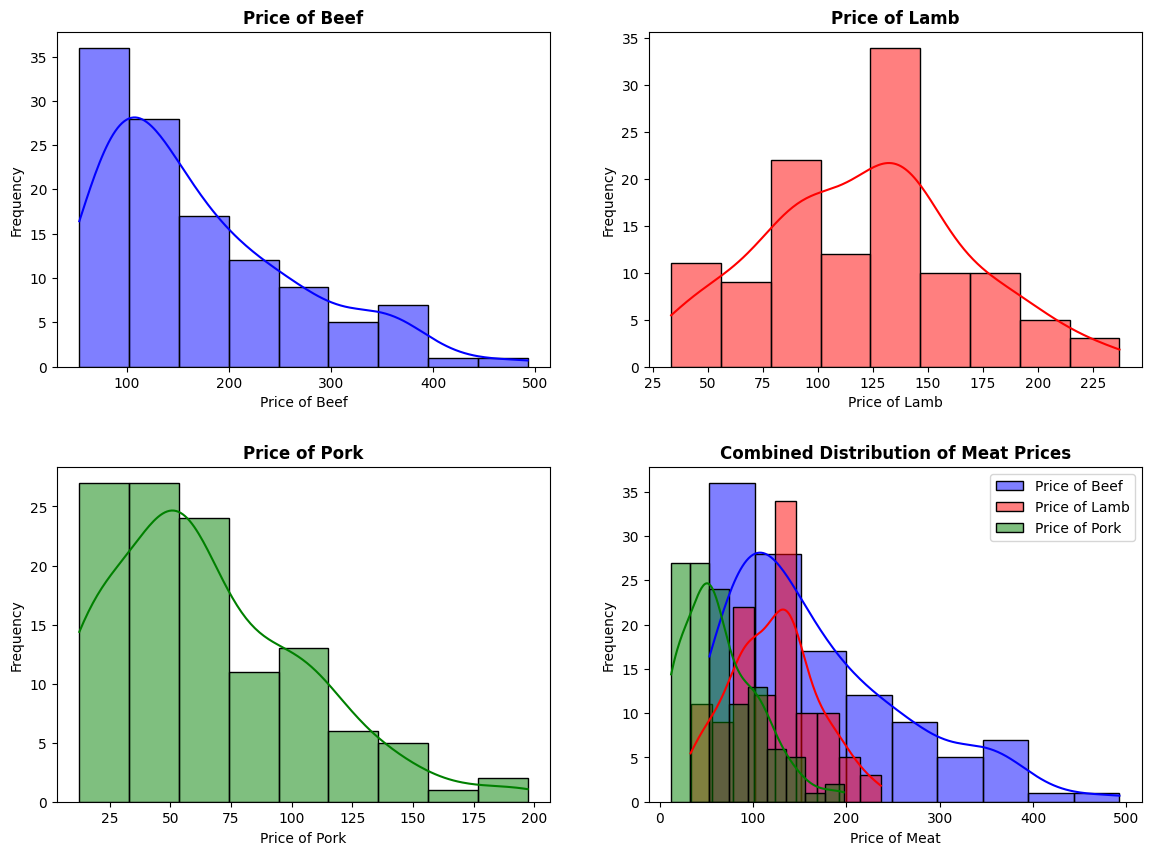

In [14]:
# Distribution plot of price of meat
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.3)

# Distribution plot of price of beef
sns.histplot(df_cp['Data.Meat.Beef'], color='blue', kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Price of Beef', fontweight='bold')
axs[0, 0].set_xlabel('Price of Beef')
axs[0, 0].set_ylabel('Frequency')

# Distribution plot of price of lamb
sns.histplot(df_cp['Data.Meat.Lamb'], color='red', kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Price of Lamb', fontweight='bold')
axs[0, 1].set_xlabel('Price of Lamb')
axs[0, 1].set_ylabel('Frequency')

# Distribution plot of price of pork
sns.histplot(df_cp['Data.Meat.Pork'], color='green', kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Price of Pork', fontweight='bold')
axs[1, 0].set_xlabel('Price of Pork')
axs[1, 0].set_ylabel('Frequency')

# Combined distribution plot
sns.histplot(df_cp['Data.Meat.Beef'], color='blue', kde=True, label='Price of Beef', ax=axs[1, 1])
sns.histplot(df_cp['Data.Meat.Lamb'], color='red', kde=True, label='Price of Lamb', ax=axs[1, 1])
sns.histplot(df_cp['Data.Meat.Pork'], color='green', kde=True, label='Price of Pork', ax=axs[1, 1])
axs[1, 1].set_title('Combined Distribution of Meat Prices', fontweight='bold')
axs[1, 1].set_xlabel('Price of Meat')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend()

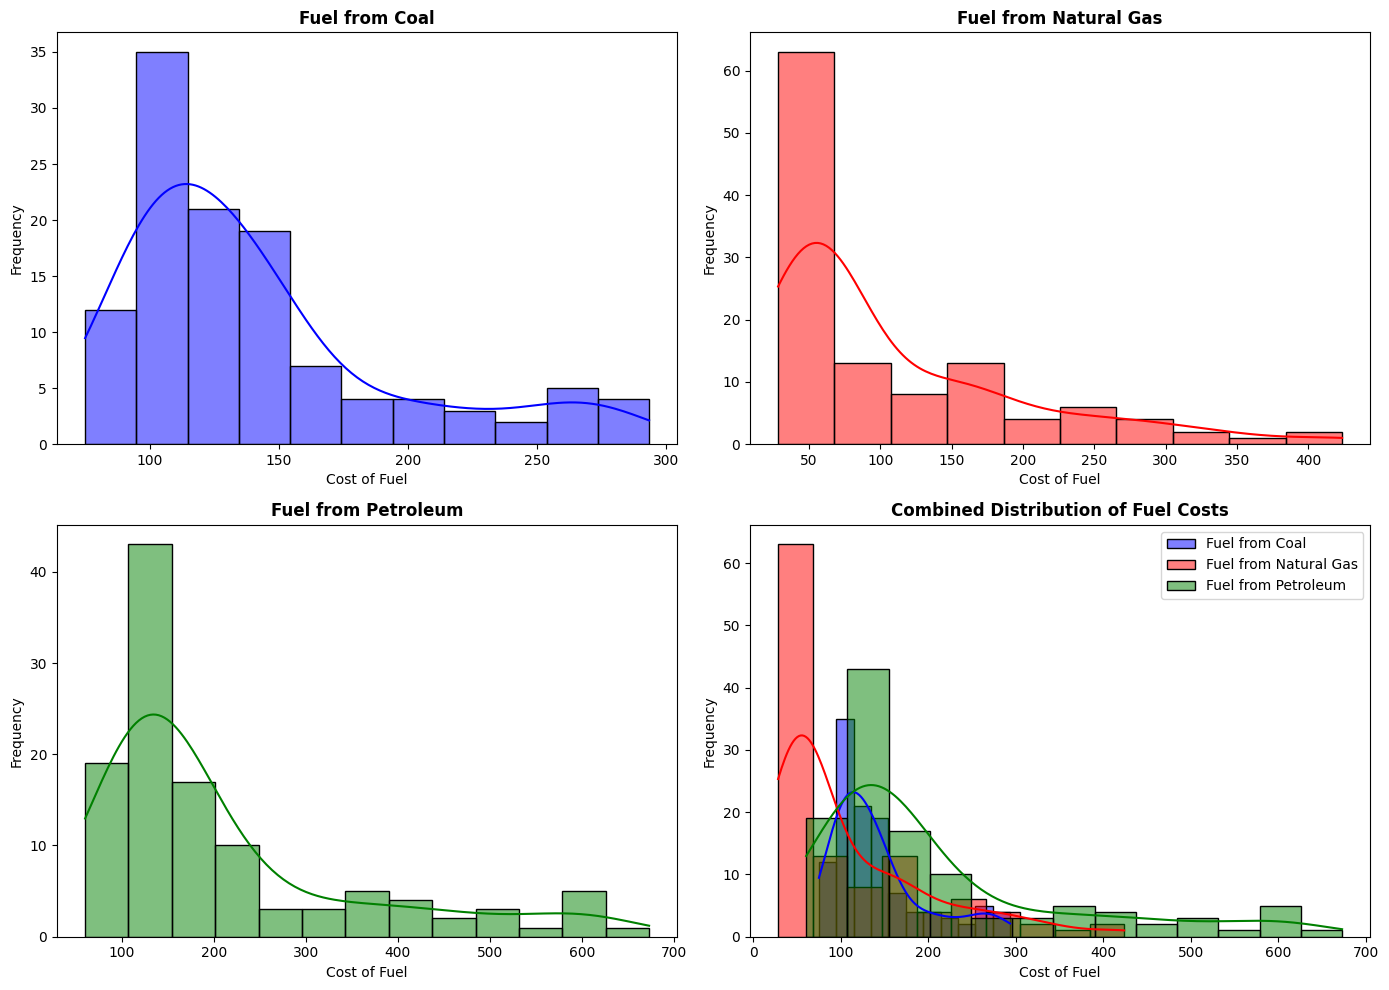

In [15]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4)

# Distribution plot of fuel from coal
sns.histplot(df_cp['Data.Fuel.Coal'], color='blue', kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Fuel from Coal', fontweight='bold')
axs[0, 0].set_xlabel('Cost of Fuel')
axs[0, 0].set_ylabel('Frequency')

# Distribution plot of fuel from natural gas
sns.histplot(df_cp['Data.Fuel.Natural gas'], color='red', kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Fuel from Natural Gas', fontweight='bold')
axs[0, 1].set_xlabel('Cost of Fuel')
axs[0, 1].set_ylabel('Frequency')

# Distribution plot of fuel from petroleum
sns.histplot(df_cp['Data.Fuel.Petroleum'], color='green', kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Fuel from Petroleum', fontweight='bold')
axs[1, 0].set_xlabel('Cost of Fuel')
axs[1, 0].set_ylabel('Frequency')

# Combined distribution plot
sns.histplot(df_cp['Data.Fuel.Coal'], color='blue', kde=True, label='Fuel from Coal', ax=axs[1, 1])
sns.histplot(df_cp['Data.Fuel.Natural gas'], color='red', kde=True, label='Fuel from Natural Gas', ax=axs[1, 1])
sns.histplot(df_cp['Data.Fuel.Petroleum'], color='green', kde=True, label='Fuel from Petroleum', ax=axs[1, 1])
axs[1, 1].set_title('Combined Distribution of Fuel Costs', fontweight='bold')
axs[1, 1].set_xlabel('Cost of Fuel')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

**Observation**

Irrespective of the source of fuel, when the price is cheaper, the demand is more and vice versa

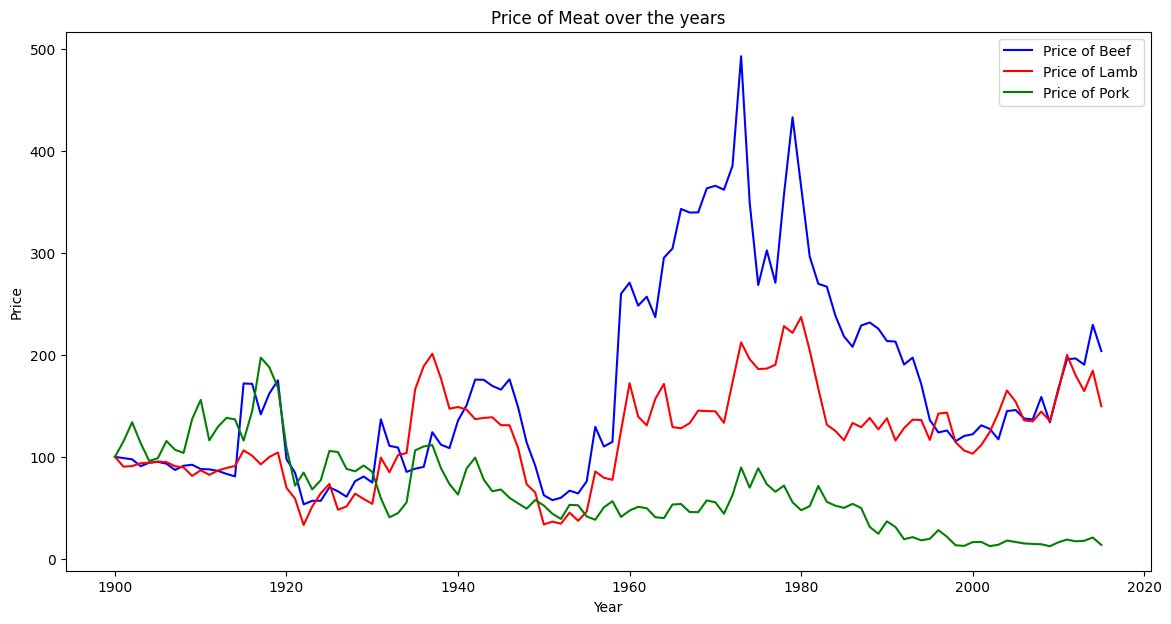

In [16]:
# Plot the time series data of price of meat against year
plt.figure(figsize=(14, 7))
sns.lineplot(df_cp['Data.Meat.Beef'], color='blue', label='Price of Beef')
sns.lineplot(df_cp['Data.Meat.Lamb'], color='red', label='Price of Lamb')
sns.lineplot(df_cp['Data.Meat.Pork'], color='green', label='Price of Pork')
plt.title('Price of Meat over the years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

**Observation**

* The price of pork significantly decrease as the year goes by although there were a very slight increase in certain years.

* The price of beef, significantly increase between 1960 and 1980. It decrease after 1980 but began to increase after the year 2000

* The price of lamb is agrueable in between the price of pork and price of beef

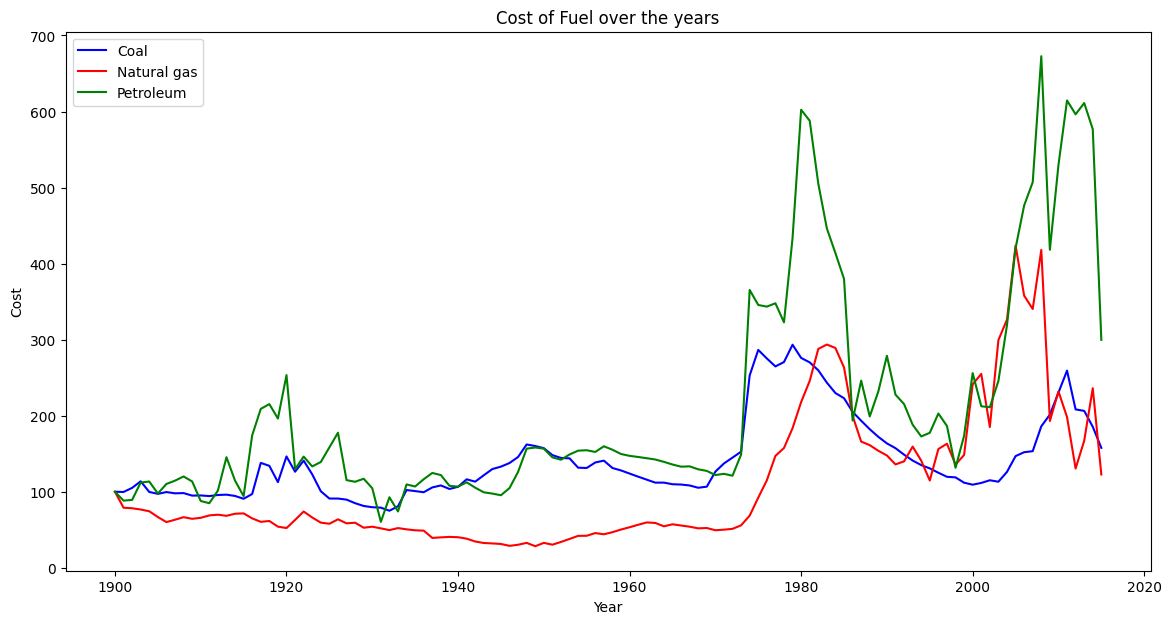

In [17]:
# Plot the time series data of Cost of fuel against year
plt.figure(figsize=(14, 7))
sns.lineplot(df_cp['Data.Fuel.Coal'], color='blue', label='Coal')
sns.lineplot(df_cp['Data.Fuel.Natural gas'], color='red', label='Natural gas')
sns.lineplot(df_cp['Data.Fuel.Petroleum'], color='green', label='Petroleum')
plt.title('Cost of Fuel over the years')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.legend()
plt.show()

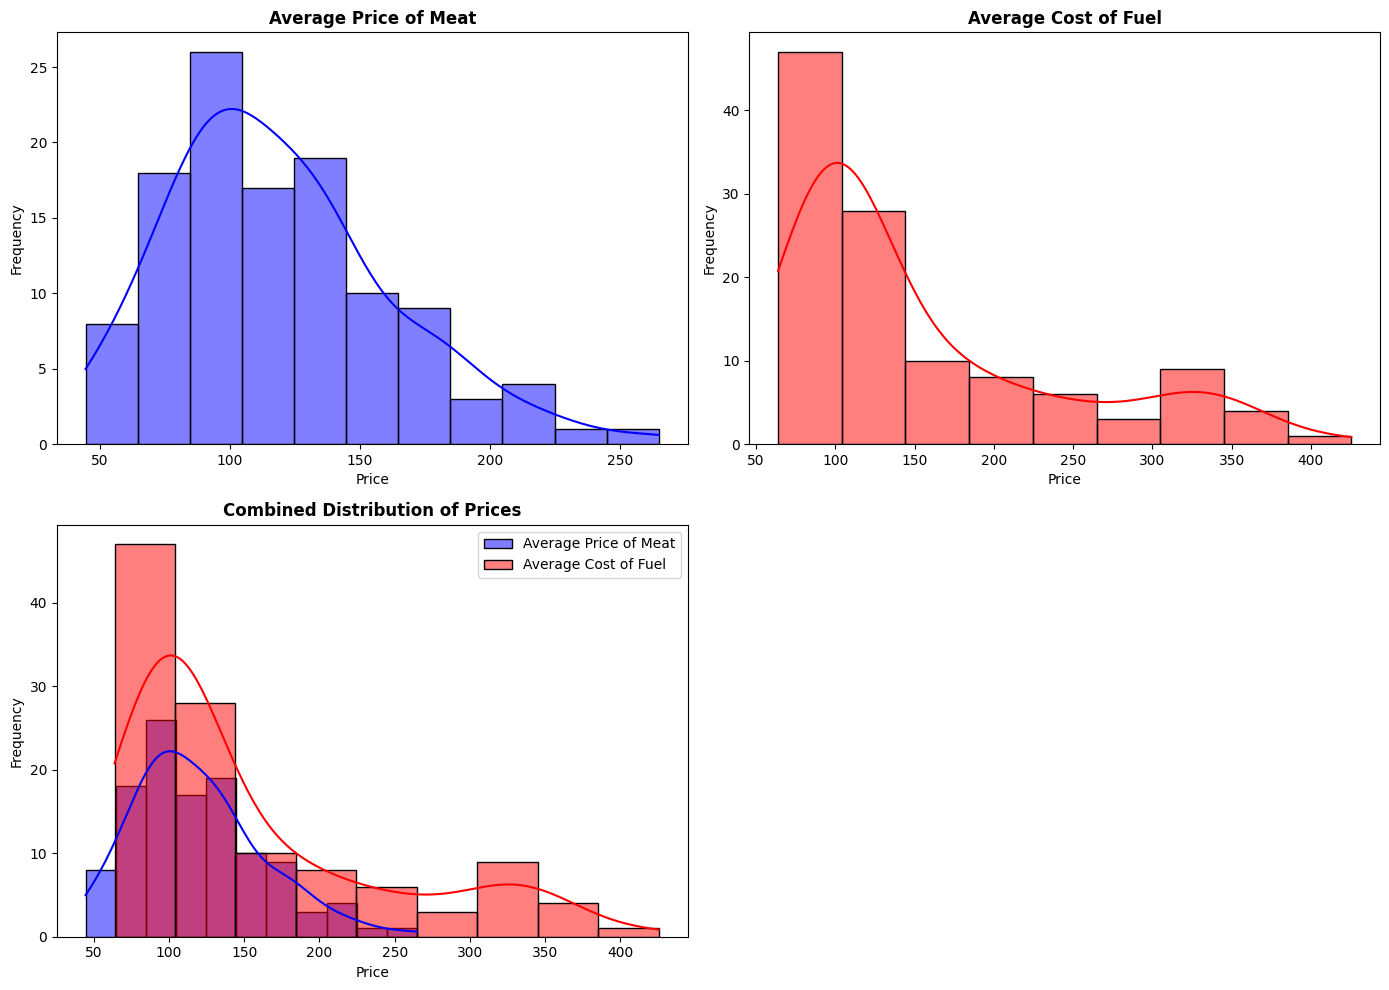

In [18]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4)  # Add some room between the rows

# Distribution plot of average price of meat
sns.histplot(df_cp['Data.Meat.Average'], color='blue', kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Average Price of Meat', fontweight='bold')
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('Frequency')

# Distribution plot of average cost of fuel
sns.histplot(df_cp['Data.Fuel.Average'], color='red', kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Average Cost of Fuel', fontweight='bold')
axs[0, 1].set_xlabel('Price')
axs[0, 1].set_ylabel('Frequency')

# Combined distribution plot
sns.histplot(df_cp['Data.Meat.Average'], color='blue', kde=True, label='Average Price of Meat', ax=axs[1, 0])
sns.histplot(df_cp['Data.Fuel.Average'], color='red', kde=True, label='Average Cost of Fuel', ax=axs[1, 0])
axs[1, 0].set_title('Combined Distribution of Prices', fontweight='bold')
axs[1, 0].set_xlabel('Price')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()

# Hide the empty subplot (bottom right)
axs[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

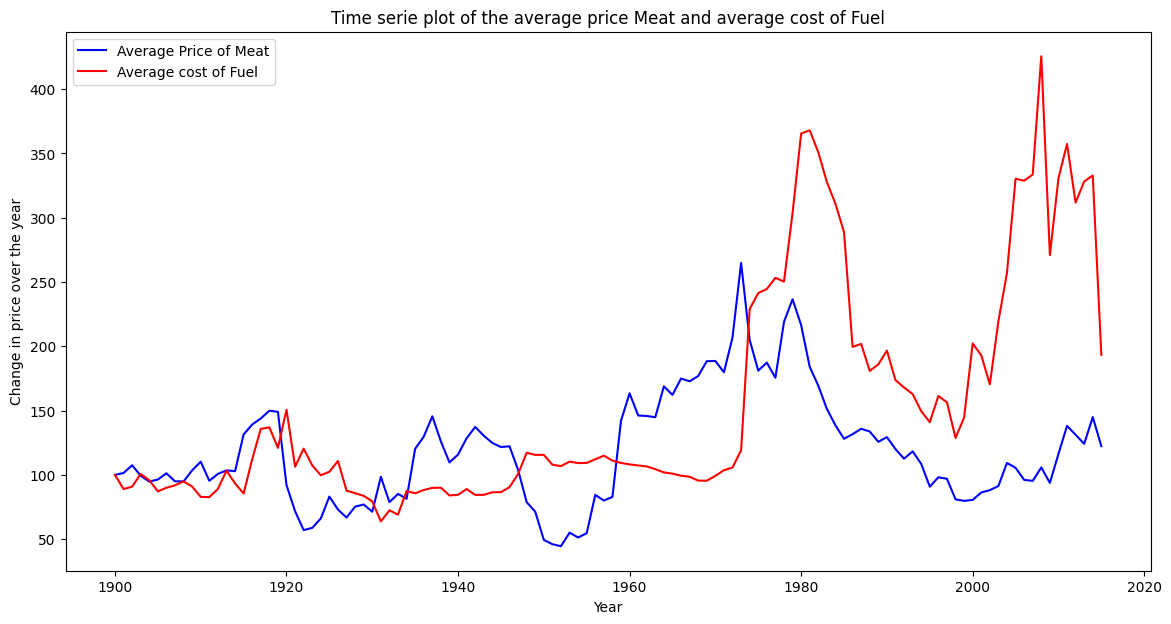

In [19]:
plt.figure(figsize=(14, 7))
sns.lineplot(df_cp['Data.Meat.Average'], color='blue', label='Average Price of Meat')
sns.lineplot(df_cp['Data.Fuel.Average'], color='red', label='Average cost of Fuel')
plt.title('Time serie plot of the average price Meat and average cost of Fuel')
plt.xlabel('Year')
plt.ylabel('Change in price over the year')
plt.legend()
plt.show()

**Question 1:**
## Is there a significant difference in the price of meat compared to the cost of fuel? Use statistical visualizations (e.g. confidence intervals, distribution plots etc.) to confirm your hypothesis

### Let's find the significant difference in the average price of meat compared to the average cost of fuel

In [20]:
import scipy
# Define the mean confidence interval function
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

# Calculate the confidence intervals using the defined function
meat_mean, meat_lower, meat_upper = mean_confidence_interval(df_cp['Data.Meat.Average'])
fuel_mean, fuel_lower, fuel_upper = mean_confidence_interval(df_cp['Data.Fuel.Average'])

print(f'95% confidence interval for the price of meat is ({meat_lower:.2f}, {meat_upper:.2f}) and the Mean is {meat_mean:.2f}')
print(f'95% confidence interval for the price of fuel is ({fuel_lower:.2f}, {fuel_upper:.2f}) and the Mean is {fuel_mean:.2f}')


95% confidence interval for the price of meat is (110.96, 126.73) and the Mean is 118.85
95% confidence interval for the price of fuel is (137.44, 169.55) and the Mean is 153.49


In [21]:
# Check for a significant difference using a t-test
t_stat, p_val = stats.ttest_ind(df_cp['Data.Meat.Average'], df_cp['Data.Fuel.Average'])

print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_val}')

# Interpret the results
if p_val < 0.05:
    print('There is a significant difference between the average price of meat and average cost of fuel.')
else:
    print('There is no significant difference between the average price of meat and average cost of fuel.')

T-test statistic: -3.837494677138347
P-value: 0.00016063284123533336
There is a significant difference between the average price of meat and average cost of fuel.


### Let's find the significant difference in each price of meat compared to the each cost of fuel

In [22]:
# Calculate the confidence intervals using the defined function for each price of meat and cost of fuel
meat_beef_mean, meat_beef_lower, meat_beef_upper = mean_confidence_interval(df_cp['Data.Meat.Beef'])
meat_lamb_mean, meat_lamb_lower, meat_lamb_upper = mean_confidence_interval(df_cp['Data.Meat.Lamb'])
meat_pork_mean, meat_pork_lower, meat_pork_upper = mean_confidence_interval(df_cp['Data.Meat.Pork'])

fuel_coal_mean, fuel_coal_lower, fuel_coal_upper = mean_confidence_interval(df_cp['Data.Fuel.Coal'])
fuel_natural_gas_mean, fuel_natural_gas_lower, fuel_natural_gas_upper = mean_confidence_interval(df_cp['Data.Fuel.Natural gas'])
fuel_petroleum_mean, fuel_petroleum_lower, fuel_petroleum_upper = mean_confidence_interval(df_cp['Data.Fuel.Petroleum'])

print(f'95% confidence interval for the price of beef is ({meat_beef_lower:.2f}, {meat_beef_upper:.2f}) and the Mean is {meat_beef_mean:.2f}')
print(f'95% confidence interval for the price of lamb is ({meat_lamb_lower:.2f}, {meat_lamb_upper:.2f}) and the Mean is {meat_lamb_mean:.2f}')
print(f'95% confidence interval for the price of pork is ({meat_pork_lower:.2f}, {meat_pork_upper:.2f}) and the Mean is {meat_pork_mean:.2f}')
print(f'95% confidence interval for the cost of coal is ({fuel_coal_lower:.2f}, {fuel_coal_upper:.2f}) and the Mean is {fuel_coal_mean:.2f}')
print(f'95% confidence interval for the cost of natural gas is ({fuel_natural_gas_lower:.2f}, {fuel_natural_gas_upper:.2f}) and the Mean is {fuel_natural_gas_mean:.2f}')
print(f'95% confidence interval for the cost of petroleum is ({fuel_petroleum_lower:.2f}, {fuel_petroleum_upper:.2f}) and the Mean is {fuel_petroleum_mean:.2f}')

95% confidence interval for the price of beef is (152.38, 187.53) and the Mean is 169.96
95% confidence interval for the price of lamb is (112.94, 129.91) and the Mean is 121.42
95% confidence interval for the price of pork is (57.69, 72.62) and the Mean is 65.16
95% confidence interval for the cost of coal is (131.52, 151.01) and the Mean is 141.26
95% confidence interval for the cost of natural gas is (91.96, 124.94) and the Mean is 108.45
95% confidence interval for the cost of petroleum is (184.06, 237.48) and the Mean is 210.77


##### The price of beef

In [23]:
# Check for a significant difference using a t-test for price of beef and cost of fuel

t_stat, p_val = stats.ttest_ind(df_cp['Data.Meat.Beef'], df_cp['Data.Fuel.Coal'])
print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_val}')
if p_val < 0.05:
    print('There is a significant difference between the price of beef and cost of fuel from coal.')
else:
    print('There is no significant difference between the price of beef and cost of fuel from coal.')

t_stat, p_val = stats.ttest_ind(df_cp['Data.Meat.Beef'], df_cp['Data.Fuel.Natural gas'])
print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_val}')
if p_val < 0.05:
    print('There is a significant difference between the price of beef and cost of fuel from natural gas.')
else:
    print('There is no significant difference between the price of beef and cost of fuel from natural gas.')

t_stat, p_val = stats.ttest_ind(df_cp['Data.Meat.Beef'], df_cp['Data.Fuel.Petroleum'])
print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_val}')
if p_val < 0.05:
    print('There is a significant difference between the price of beef and cost of fuel from petroleum.')
else:
    print('There is no significant difference between the price of beef and cost of fuel from petroleum')

T-test statistic: 2.8285249607001637
P-value: 0.0050890491695418155
There is a significant difference between the price of beef and cost of fuel from coal.
T-test statistic: 5.055105643402416
P-value: 8.77640055437743e-07
There is a significant difference between the price of beef and cost of fuel from natural gas.
T-test statistic: -2.5283044864067716
P-value: 0.012132207519284309
There is a significant difference between the price of beef and cost of fuel from petroleum.


##### The price of lamb meat

In [24]:
# Check for a significant difference using a t-test for price of lamb meat and cost of fuel

t_stat, p_val = stats.ttest_ind(df_cp['Data.Meat.Lamb'], df_cp['Data.Fuel.Coal'])
print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_val}')
if p_val < 0.05:
    print('There is a significant difference between the price of lamb meat and cost of fuel from coal.')
else:
    print('There is no significant difference between the price of lamb meat and cost of fuel from coal.')

t_stat, p_val = stats.ttest_ind(df_cp['Data.Meat.Lamb'], df_cp['Data.Fuel.Natural gas'])
print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_val}')
if p_val < 0.05:
    print('There is a significant difference between the price of lamb meat and cost of fuel from natural gas.')
else:
    print('There is no significant difference between the price of lamb meat and cost of fuel from natural gas')

t_stat, p_val = stats.ttest_ind(df_cp['Data.Meat.Lamb'], df_cp['Data.Fuel.Petroleum'])
print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_val}')
if p_val < 0.05:
    print('There is a significant difference between the price of lamb meat and cost of fuel from petroleum.')
else:
    print('There is no significant difference between the price of lamb meat and cost of fuel from petroleum')

T-test statistic: -3.0411301614332036
P-value: 0.002630194304042332
There is a significant difference between the price of lamb meat and cost of fuel from coal.
T-test statistic: 1.3856951493420966
P-value: 0.167182175876698
There is no significant difference between the price of lamb meat and cost of fuel from natural gas
T-test statistic: -6.314692054604057
P-value: 1.3821826018656092e-09
There is a significant difference between the price of lamb meat and cost of fuel from petroleum.


##### The price of pork

In [25]:
# Check for a significant difference using a t-test for price of Pork and cost of fuel

t_stat, p_val = stats.ttest_ind(df_cp['Data.Meat.Pork'], df_cp['Data.Fuel.Coal'])
print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_val}')
if p_val < 0.05:
    print('There is a significant difference between the price of pork and cost of fuel from coal.')
else:
    print('There is no significant difference between the price of pork and cost of fuel from coal.')

t_stat, p_val = stats.ttest_ind(df_cp['Data.Meat.Pork'], df_cp['Data.Fuel.Natural gas'])
print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_val}')
if p_val < 0.05:
    print('There is a significant difference between the price of pork and cost of fuel from natural gas.')
else:
    print('There is no significant difference between the price of pork and cost of fuel from natural gas')

t_stat, p_val = stats.ttest_ind(df_cp['Data.Meat.Pork'], df_cp['Data.Fuel.Petroleum'])
print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_val}')
if p_val < 0.05:
    print('There is a significant difference between the price of pork and cost of fuel from petroleum.')
else:
    print('There is no significant difference between the price of pork and cost of fuel from petroleum')

T-test statistic: -12.279336051614838
P-value: 5.493620581322619e-27
There is a significant difference between the price of pork and cost of fuel from coal.
T-test statistic: -4.736370469153087
P-value: 3.807546313470224e-06
There is a significant difference between the price of pork and cost of fuel from natural gas.
T-test statistic: -10.399645635140999
P-value: 5.1877643835304705e-21
There is a significant difference between the price of pork and cost of fuel from petroleum.


### **Question 2:**

## Are there any observable relationships between the price of grain and the price of metal?

In [26]:
# Show info of each column, let see the type of date type
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 1900-01-01 to 2015-01-01
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Data.Meat.Beef                 116 non-null    float64
 1   Data.Meat.Lamb                 116 non-null    float64
 2   Data.Meat.Pork                 116 non-null    float64
 3   Data.Meat.Average              116 non-null    float64
 4   Data.Fuel.Coal                 116 non-null    float64
 5   Data.Fuel.Natural gas          116 non-null    float64
 6   Data.Fuel.Petroleum            116 non-null    float64
 7   Data.Fuel.Average              116 non-null    float64
 8   Data.Grain.Corn                116 non-null    float64
 9   Data.Grain.Rice                116 non-null    float64
 10  Data.Grain.Rye                 116 non-null    float64
 11  Data.Grain.Wheat               116 non-null    float64
 12  Data.Grain.Average             

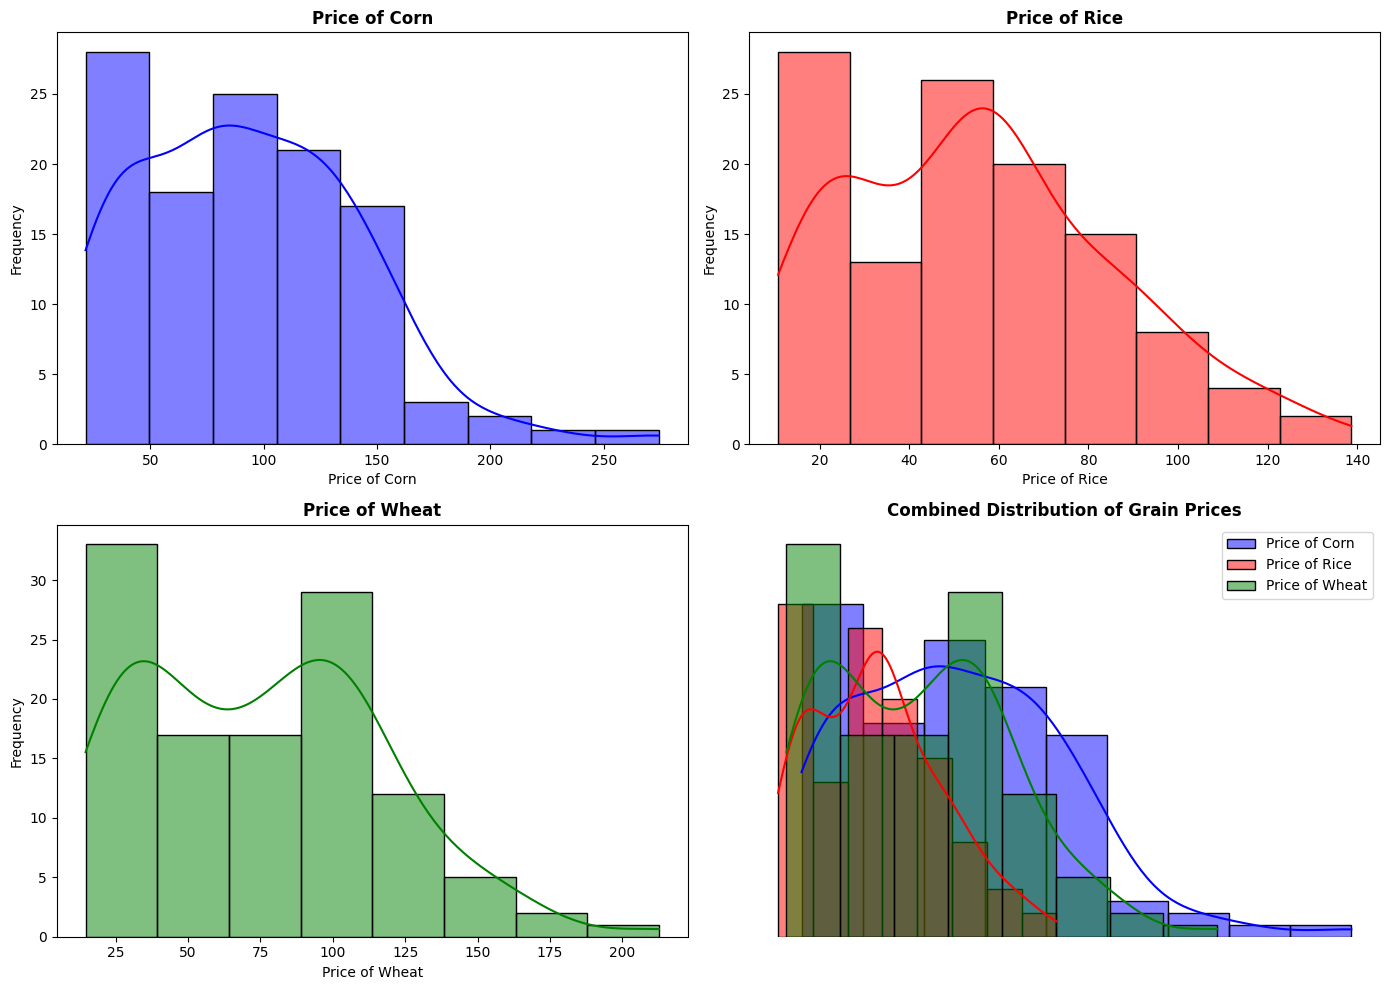

In [27]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4)  # Add some room between the rows

# Distribution plot of price of corn
sns.histplot(df_cp['Data.Grain.Corn'], color='blue', kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Price of Corn', fontweight='bold')
axs[0, 0].set_xlabel('Price of Corn')
axs[0, 0].set_ylabel('Frequency')

# Distribution plot of price of rice
sns.histplot(df_cp['Data.Grain.Rice'], color='red', kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Price of Rice', fontweight='bold')
axs[0, 1].set_xlabel('Price of Rice')
axs[0, 1].set_ylabel('Frequency')

# Distribution plot of price of wheat
sns.histplot(df_cp['Data.Grain.Wheat'], color='green', kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Price of Wheat', fontweight='bold')
axs[1, 0].set_xlabel('Price of Wheat')
axs[1, 0].set_ylabel('Frequency')

# Combined distribution plot
sns.histplot(df_cp['Data.Grain.Corn'], color='blue', kde=True, label='Price of Corn', ax=axs[1, 1])
sns.histplot(df_cp['Data.Grain.Rice'], color='red', kde=True, label='Price of Rice', ax=axs[1, 1])
sns.histplot(df_cp['Data.Grain.Wheat'], color='green', kde=True, label='Price of Wheat', ax=axs[1, 1])
axs[1, 1].set_title('Combined Distribution of Grain Prices', fontweight='bold')
axs[1, 1].set_xlabel('Price of Grain')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend()

# Hide the empty subplot (bottom right)
axs[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

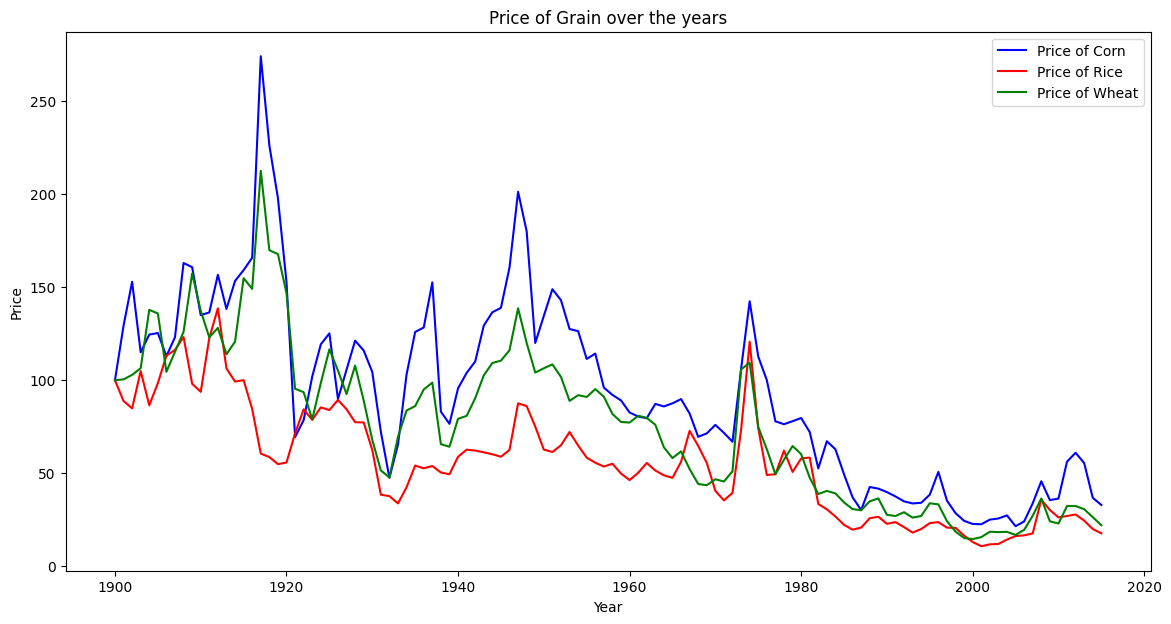

In [28]:
# Plot the time series data of price of grain
plt.figure(figsize=(14, 7))
sns.lineplot(df_cp['Data.Grain.Corn'], color='blue', label='Price of Corn')
sns.lineplot(df_cp['Data.Grain.Rice'], color='red', label='Price of Rice')
sns.lineplot(df_cp['Data.Grain.Wheat'], color='green', label='Price of Wheat')
plt.title('Price of Grain over the years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

**Observation**

The price of grain kept reducing over the years

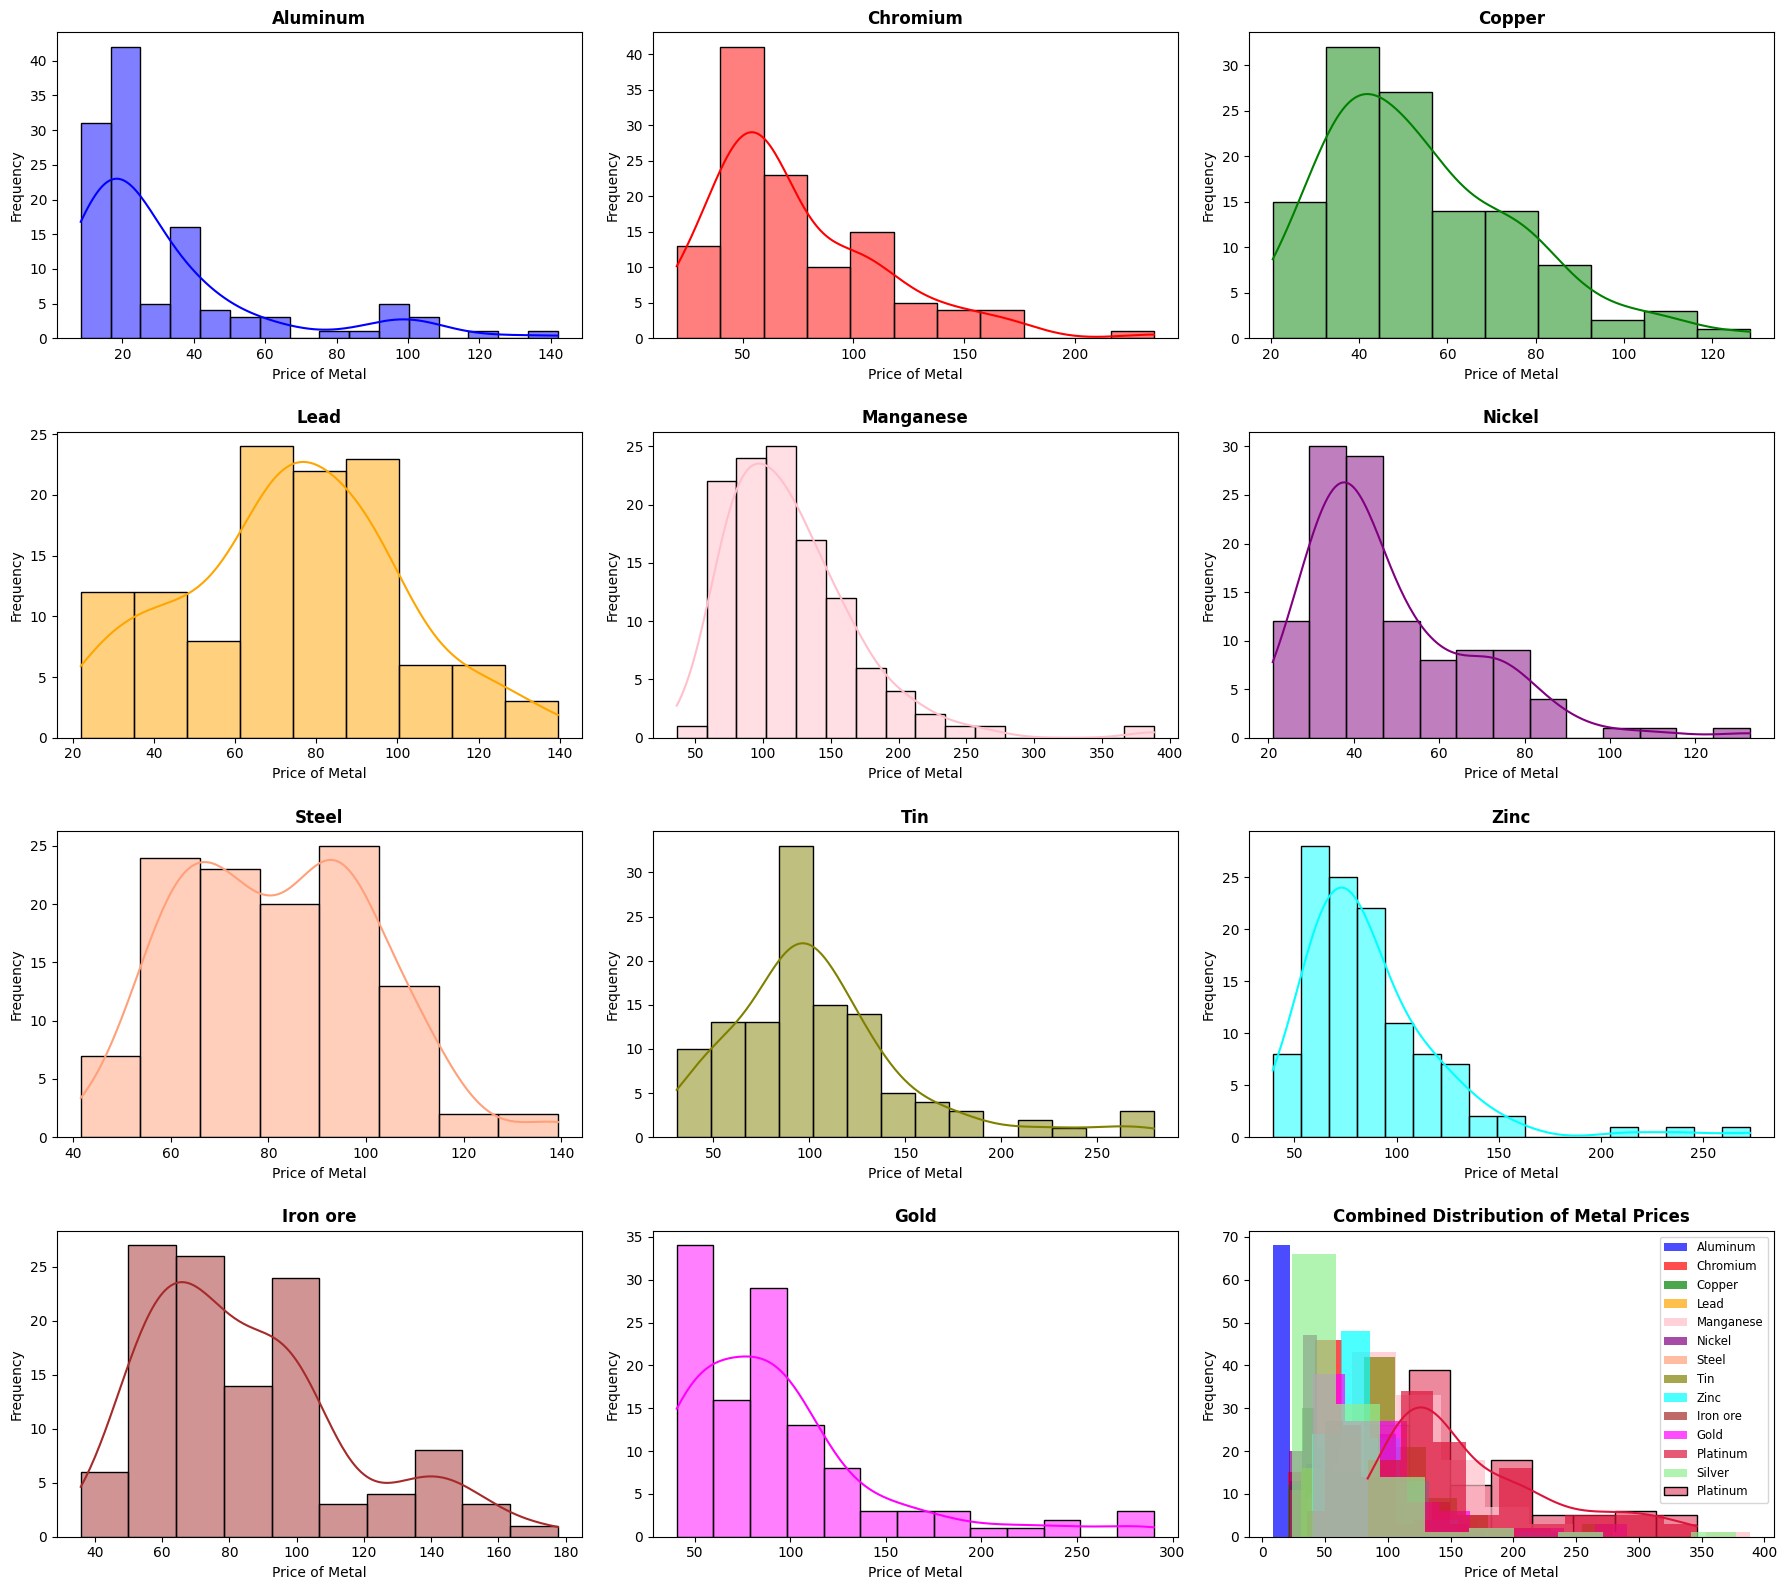

In [29]:
# Distribution plot of price of metal
# Create subplots; adjust the number of rows and columns based on the number of histograms
fig, axs = plt.subplots(4, 3, figsize=(18, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# List of metal types and colors
metals = {
    'Aluminum': 'blue',
    'Chromium': 'red',
    'Copper': 'green',
    'Lead': 'orange',
    'Manganese': 'pink',
    'Nickel': 'purple',
    'Steel': 'lightsalmon',
    'Tin': 'olive',
    'Zinc': 'cyan',
    'Iron ore': 'brown',
    'Gold': 'magenta',
    'Platinum': 'crimson',
    'Silver': 'lightgreen'
}

# Plot each metal in its own subplot
for i, (metal, color) in enumerate(metals.items()):
    row = i // 3
    col = i % 3
    # Check if the calculated row index is within the valid range
    if row < axs.shape[0]:
        sns.histplot(df_cp[f'Data.Metal.{metal}'], color=color, kde=True, label=metal, ax=axs[row, col])
        axs[row, col].set_title(metal, fontweight='bold')
        axs[row, col].set_xlabel('Price of Metal')
        axs[row, col].set_ylabel('Frequency')

# Combined distribution plot in the last subplot
axs[-1, -1].hist(df_cp['Data.Metal.Aluminum'], color='blue', alpha=0.7, label='Aluminum')
axs[-1, -1].hist(df_cp['Data.Metal.Chromium'], color='red', alpha=0.7, label='Chromium')
axs[-1, -1].hist(df_cp['Data.Metal.Copper'], color='green', alpha=0.7, label='Copper')
axs[-1, -1].hist(df_cp['Data.Metal.Lead'], color='orange', alpha=0.7, label='Lead')
axs[-1, -1].hist(df_cp['Data.Metal.Manganese'], color='pink', alpha=0.7, label='Manganese')
axs[-1, -1].hist(df_cp['Data.Metal.Nickel'], color='purple', alpha=0.7, label='Nickel')
axs[-1, -1].hist(df_cp['Data.Metal.Steel'], color='lightsalmon', alpha=0.7, label='Steel')
axs[-1, -1].hist(df_cp['Data.Metal.Tin'], color='olive', alpha=0.7, label='Tin')
axs[-1, -1].hist(df_cp['Data.Metal.Zinc'], color='cyan', alpha=0.7, label='Zinc')
axs[-1, -1].hist(df_cp['Data.Metal.Iron ore'], color='brown', alpha=0.7, label='Iron ore')
axs[-1, -1].hist(df_cp['Data.Metal.Gold'], color='magenta', alpha=0.7, label='Gold')
axs[-1, -1].hist(df_cp['Data.Metal.Platinum'], color='crimson', alpha=0.7, label='Platinum')
axs[-1, -1].hist(df_cp['Data.Metal.Silver'], color='lightgreen', alpha=0.7, label='Silver')
axs[-1, -1].set_title('Combined Distribution of Metal Prices', fontweight='bold')
axs[-1, -1].set_xlabel('Price of Metal')
axs[-1, -1].set_ylabel('Frequency')
axs[-1, -1].legend(fontsize='small')

# Hide any unused subplots (in case of more subplots than needed)
for i in range(len(metals), 12):  # Adjust 12 if grid size changes
    fig.delaxes(axs.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()

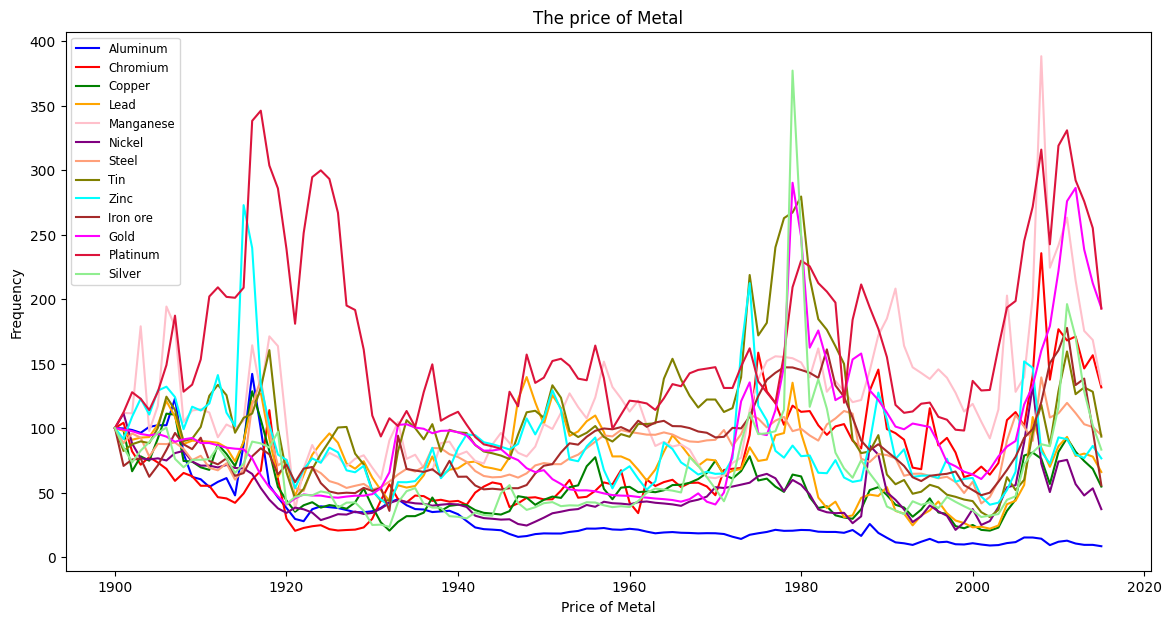

In [30]:
# Plot of time series data of price of metal
plt.figure(figsize=(14, 7))
sns.lineplot(df_cp['Data.Metal.Aluminum'], color='blue', label='Aluminum')
sns.lineplot(df_cp['Data.Metal.Chromium'], color='red', label='Chromium')
sns.lineplot(df_cp['Data.Metal.Copper'], color='green', label='Copper')
sns.lineplot(df_cp['Data.Metal.Lead'], color='orange', label='Lead')
sns.lineplot(df_cp['Data.Metal.Manganese'], color='pink', label='Manganese')
sns.lineplot(df_cp['Data.Metal.Nickel'], color='purple', label='Nickel')
sns.lineplot(df_cp['Data.Metal.Steel'], color='lightsalmon', label='Steel')
sns.lineplot(df_cp['Data.Metal.Tin'], color='olive', label='Tin')
sns.lineplot(df_cp['Data.Metal.Zinc'], color='cyan', label='Zinc')
sns.lineplot(df_cp['Data.Metal.Iron ore'], color='brown', label='Iron ore')
sns.lineplot(df_cp['Data.Metal.Gold'], color='magenta', label='Gold')
sns.lineplot(df_cp['Data.Metal.Platinum'], color='crimson', label='Platinum')
sns.lineplot(df_cp['Data.Metal.Silver'], color='lightgreen', label='Silver')
plt.title('The price of Metal')
plt.xlabel('Price of Metal')
plt.ylabel('Frequency')
plt.legend(fontsize='small')
plt.show()

**To check for relationship(s) between the price of grain and metal**

In [31]:
# Create a list of grain and metal columns to compare
grains = ['Data.Grain.Corn', 'Data.Grain.Rice', 'Data.Grain.Wheat']
metals = ['Data.Metal.Aluminum', 'Data.Metal.Chromium', 'Data.Metal.Copper',
          'Data.Metal.Lead', 'Data.Metal.Manganese', 'Data.Metal.Nickel',
          'Data.Metal.Steel', 'Data.Metal.Tin', 'Data.Metal.Zinc',
          'Data.Metal.Iron ore', 'Data.Metal.Gold', 'Data.Metal.Platinum',
          'Data.Metal.Silver']

# Create a new DataFrame with the selected columns
df_cp_gm = df_cp[grains + metals]

# Rename columns to single words
def rename_column(col):
    if 'Data.Grain' in col:
        return col.split('.')[-1]  # Extract the last part after 'Data.Grain'
    elif 'Data.Metal' in col:
        return col.split('.')[-1]  # Extract the last part after 'Data.Metal'
    return col

df_cp_gm.columns = [rename_column(col) for col in df_cp_gm.columns]

# Calculate the correlation matrix
correlation_matrix = df_cp_gm.corr()

# Display the correlation matrix
correlation_matrix


,Corn,Rice,Wheat,Aluminum,Chromium,Copper,Lead,Manganese,Nickel,Steel,Tin,Zinc,Iron ore,Gold,Platinum,Silver
Corn,1.000000,0.734019,0.949261,0.554655,-0.419252,0.385929,0.660764,-0.295047,0.060781,-0.012390,0.191523,0.451211,-0.219535,-0.325051,0.099700,-0.009451
Rice,0.734019,1.000000,0.790565,0.660726,-0.426819,0.484060,0.633837,-0.302350,0.287281,-0.082267,0.212151,0.499052,-0.161572,-0.276608,0.019684,0.062909
Wheat,0.949261,0.790565,1.000000,0.652571,-0.478176,0.408386,0.629989,-0.304019,0.112953,-0.068315,0.108331,0.487779,-0.275294,-0.361576,0.109865,-0.024179
Aluminum,0.554655,0.660726,0.652571,1.000000,-0.209308,0.623987,0.429531,-0.053411,0.507379,0.084312,-0.001043,0.500507,-0.175108,-0.151055,0.107659,0.091334
Chromium,-0.419252,-0.426819,-0.478176,-0.209308,1.000000,0.282865,-0.074554,0.811938,0.440657,0.613951,0.335906,0.085589,0.620082,0.739985,0.343648,0.518520
Copper,0.385929,0.484060,0.408386,0.623987,0.282865,1.000000,0.642820,0.344884,0.733421,0.560111,0.349273,0.668190,0.342799,0.213588,0.415096,0.434489
Lead,0.660764,0.633837,0.629989,0.429531,-0.074554,0.642820,1.000000,0.032538,0.332712,0.308013,0.465826,0.505340,0.178759,0.022545,0.262945,0.329025
Manganese,-0.295047,-0.302350,-0.304019,-0.053411,0.811938,0.344884,0.032538,1.000000,0.376579,0.535123,0.199574,0.140600,0.514890,0.581085,0.450957,0.410859
Nickel,0.060781,0.287281,0.112953,0.507379,0.440657,0.733421,0.332712,0.376579,1.000000,0.413015,0.207621,0.500071,0.304616,0.300463,0.224615,0.380945
Steel,-0.012390,-0.082267,-0.068315,0.084312,0.613951,0.560111,0.308013,0.535123,0.413015,1.000000,0.583084,0.246799,0.772891,0.453288,0.368810,0.490411


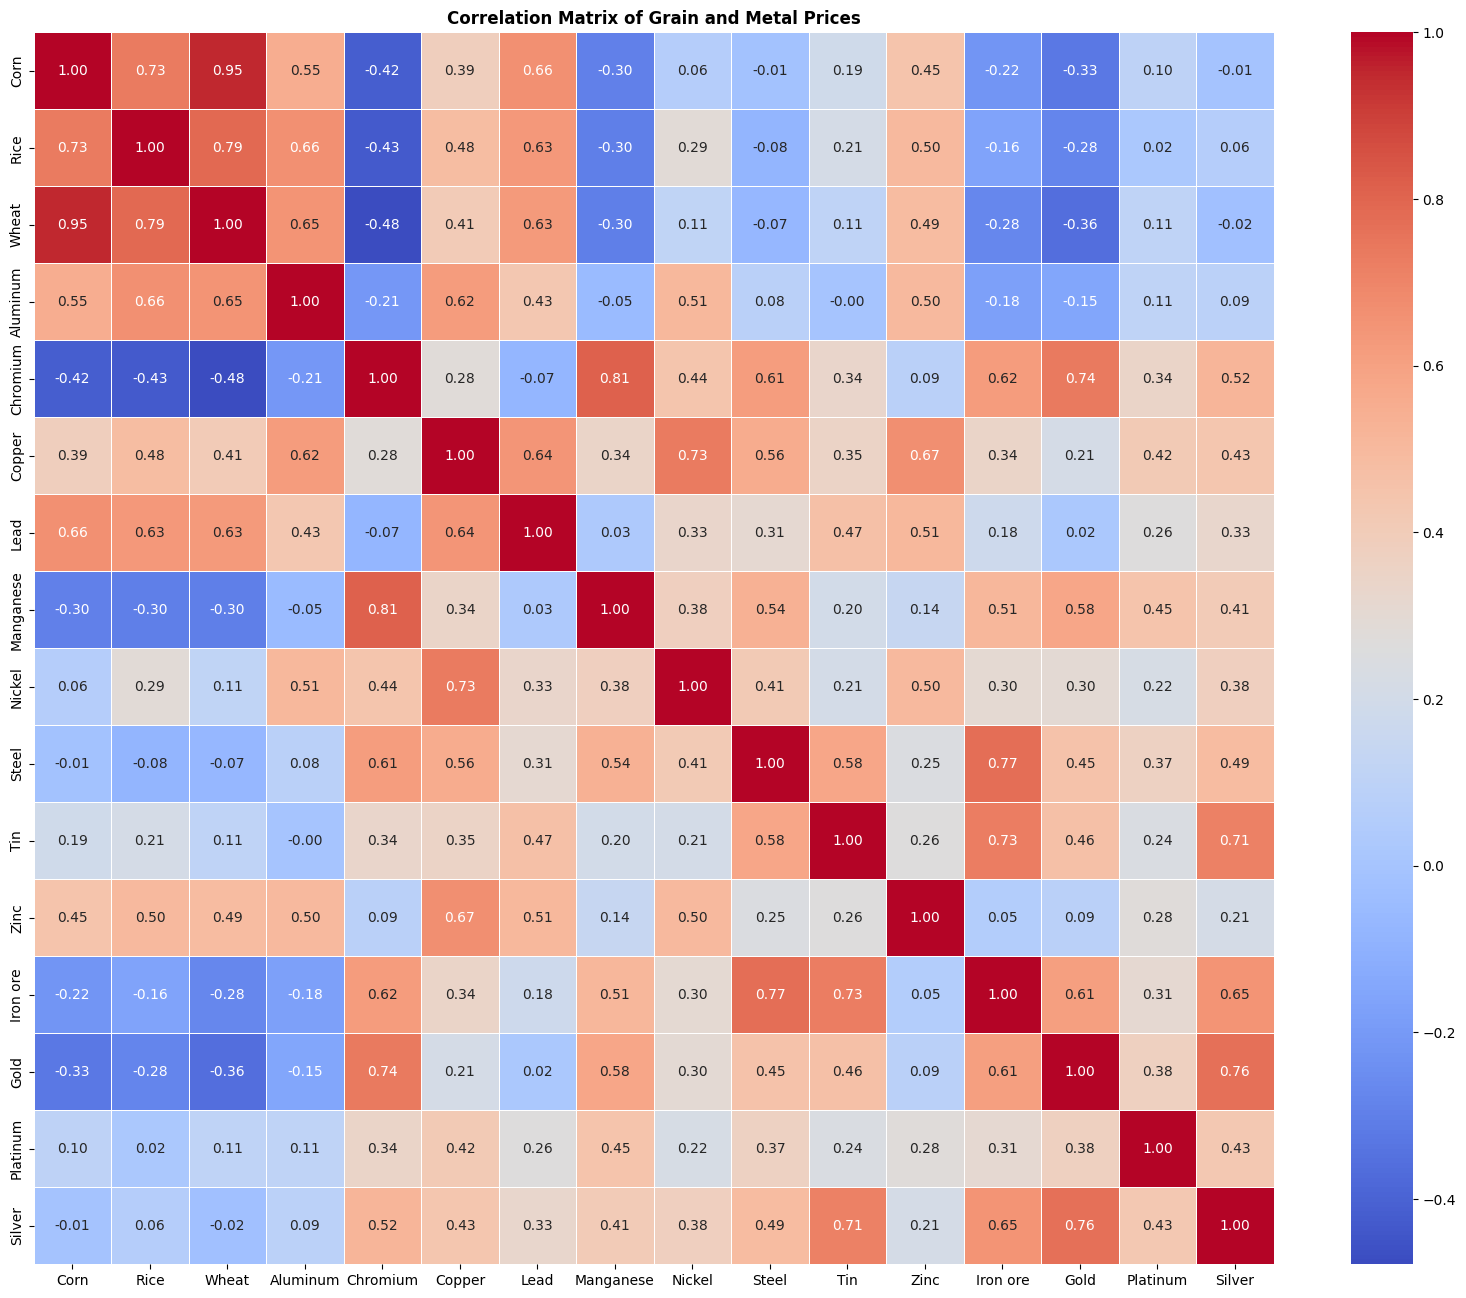

In [32]:
# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Grain and Metal Prices', fontweight='bold')
plt.show()

### Based on the correlation matrix and heatmap, we can observe the following relationships:

# **Positive Correlations:**
- Corn and Wheat: Very strong positive correlation (0.95), suggesting that their prices tend to move in the same direction.
- Rice and Wheat: Strong positive correlation (0.79), indicating a pronounced tendency to move together.
- Several metals show weak to moderate positive correlations among themselves (e.g., Aluminum and Copper, Lead and Zinc).

# **Negative Correlations:**
- Gold and Aluminium: Gold generally shows weak negative correlations with Aluminium, suggesting it tends to move in the opposite direction.
- Platinum and most other metals (except Copper, Silver, and Manganese): Platinum also exhibits weak negative correlations with most metals.

# **Overall:**
- The correlations between grain prices and metal prices are generally weak, indicating no strong linear relationships.
- There are more pronounced correlations within the metal group, suggesting common factors influencing their prices.

# **Further Analysis:**
- I will use regression analysis to explore potential causal relationships and predict future price trends.

In [33]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error # Import necessary functions

X = df_cp_gm[['Corn', 'Rice', 'Wheat']]
y = df_cp_gm[['Aluminum', 'Chromium', 'Copper', 'Lead', 'Manganese', 'Nickel',
             'Steel', 'Tin', 'Zinc', 'Iron ore', 'Gold', 'Platinum', 'Silver']]

# Linear Regression using scikit-learn
lr = LinearRegression()
lr.fit(X, y)

# Predictions
y_pred = lr.predict(X)

# Evaluate the model
# Use the updated column names (metals without 'Data.Metal.')
r2_scores = {metal: r2_score(y[metal], y_pred[:, i]) for i, metal in enumerate(['Aluminum', 'Chromium', 'Copper', 'Lead', 'Manganese', 'Nickel',
             'Steel', 'Tin', 'Zinc', 'Iron ore', 'Gold', 'Platinum', 'Silver'])}
mse_scores = {metal: mean_squared_error(y[metal], y_pred[:, i]) for i, metal in enumerate(['Aluminum', 'Chromium', 'Copper', 'Lead', 'Manganese', 'Nickel',
             'Steel', 'Tin', 'Zinc', 'Iron ore', 'Gold', 'Platinum', 'Silver'])}

# Print coefficients, R-squared and MSE for each metal
print("\033[1mLinear Regression Coefficients:\033[0m")
for i, metal in enumerate(['Aluminum', 'Chromium', 'Copper', 'Lead', 'Manganese', 'Nickel',
             'Steel', 'Tin', 'Zinc', 'Iron ore', 'Gold', 'Platinum', 'Silver']):
    print(f'{metal}: {lr.coef_[i]}') # Change is here. Removed the column indexing

print("\033[1m\nR-squared Scores:\033[0m")
for metal, score in r2_scores.items():
    print(f'{metal}: {score:.2f}')

print("\033[1m\nMean Squared Error Scores:\033[0m")
for metal, mse in mse_scores.items():
    print(f'{metal}: {mse:.2f}')

Linear Regression Coefficients:
Aluminum: [-0.33508986  0.33569535  0.6118087 ]
Chromium: [ 0.26587684 -0.15366845 -0.65574029]
Copper: [0.02431937 0.32084175 0.00790912]
Lead: [ 0.38159294  0.35484626 -0.21900077]
Manganese: [-0.093897   -0.28214262 -0.09534532]
Nickel: [-0.15550335  0.34226586  0.03486646]
Steel: [ 0.21088139 -0.03514975 -0.2458522 ]
Tin: [ 0.92625797  0.6065327  -1.2398452 ]
Zinc: [-0.05093833  0.36225573  0.26998031]
Iron ore: [ 0.27400894  0.17046351 -0.59283243]
Gold: [ 0.20562397  0.0592717  -0.71799969]
Platinum: [-0.10171293 -0.4006988   0.50497307]
Silver: [ 0.16189695  0.34861724 -0.39908808]

R-squared Scores:
Aluminum: 0.52
Chromium: 0.25
Copper: 0.24
Lead: 0.49
Manganese: 0.10
Nickel: 0.13
Steel: 0.03
Tin: 0.14
Zinc: 0.27
Iron ore: 0.10
Gold: 0.13
Platinum: 0.02
Silver: 0.02

Mean Squared Error Scores:
Aluminum: 363.58
Chromium: 1153.76
Copper: 364.12
Lead: 357.38
Manganese: 2151.36
Nickel: 336.97
Steel: 375.02
Tin: 1891.36
Zinc: 921.32
Iron ore: 786.44
G

**Based on the low R-squared values obtained from the linear regression model, it appears that the prices of grain (Corn, Rice, Wheat) are not strong predictors of the prices of the various metals. This suggests that other factors, beyond the scope of this simple model, are likely influencing the prices of metals.**


**-Potential reasons for the weak predictive power of grain prices on metal prices:**

1. Different Market Dynamics: The markets for grains and metals are influenced by different factors. Grain prices are often affected by weather patterns, global demand for food, and government policies related to agriculture. Metal prices, on the other hand, are influenced by industrial demand, global economic conditions, and geopolitical factors.

2. Complex Supply Chains: The supply chains for metals are often more complex and globalized than those for grains. This can lead to price fluctuations that are not directly linked to the price of raw materials like grain.

3. Speculation and Investor Sentiment: Both grain and metal markets are subject to speculation and investor sentiment, which can drive prices independently of fundamental supply and demand factors.

4. Limited Data: The dataset used for this analysis may not be comprehensive enough to capture all the relevant factors that influence metal prices.

**Conclusion:**

While the initial linear regression model suggests that grain prices are not strong predictors of metal prices, further investigation is warranted to uncover the complex interplay of factors that influence these markets.


### **Question 3**
#### **What attributes in the dataset are positively correlated to each other and which ones are negatively correlated?**

In [34]:
# Show info of each column, let see the type of date type
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 1900-01-01 to 2015-01-01
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Data.Meat.Beef                 116 non-null    float64
 1   Data.Meat.Lamb                 116 non-null    float64
 2   Data.Meat.Pork                 116 non-null    float64
 3   Data.Meat.Average              116 non-null    float64
 4   Data.Fuel.Coal                 116 non-null    float64
 5   Data.Fuel.Natural gas          116 non-null    float64
 6   Data.Fuel.Petroleum            116 non-null    float64
 7   Data.Fuel.Average              116 non-null    float64
 8   Data.Grain.Corn                116 non-null    float64
 9   Data.Grain.Rice                116 non-null    float64
 10  Data.Grain.Rye                 116 non-null    float64
 11  Data.Grain.Wheat               116 non-null    float64
 12  Data.Grain.Average             

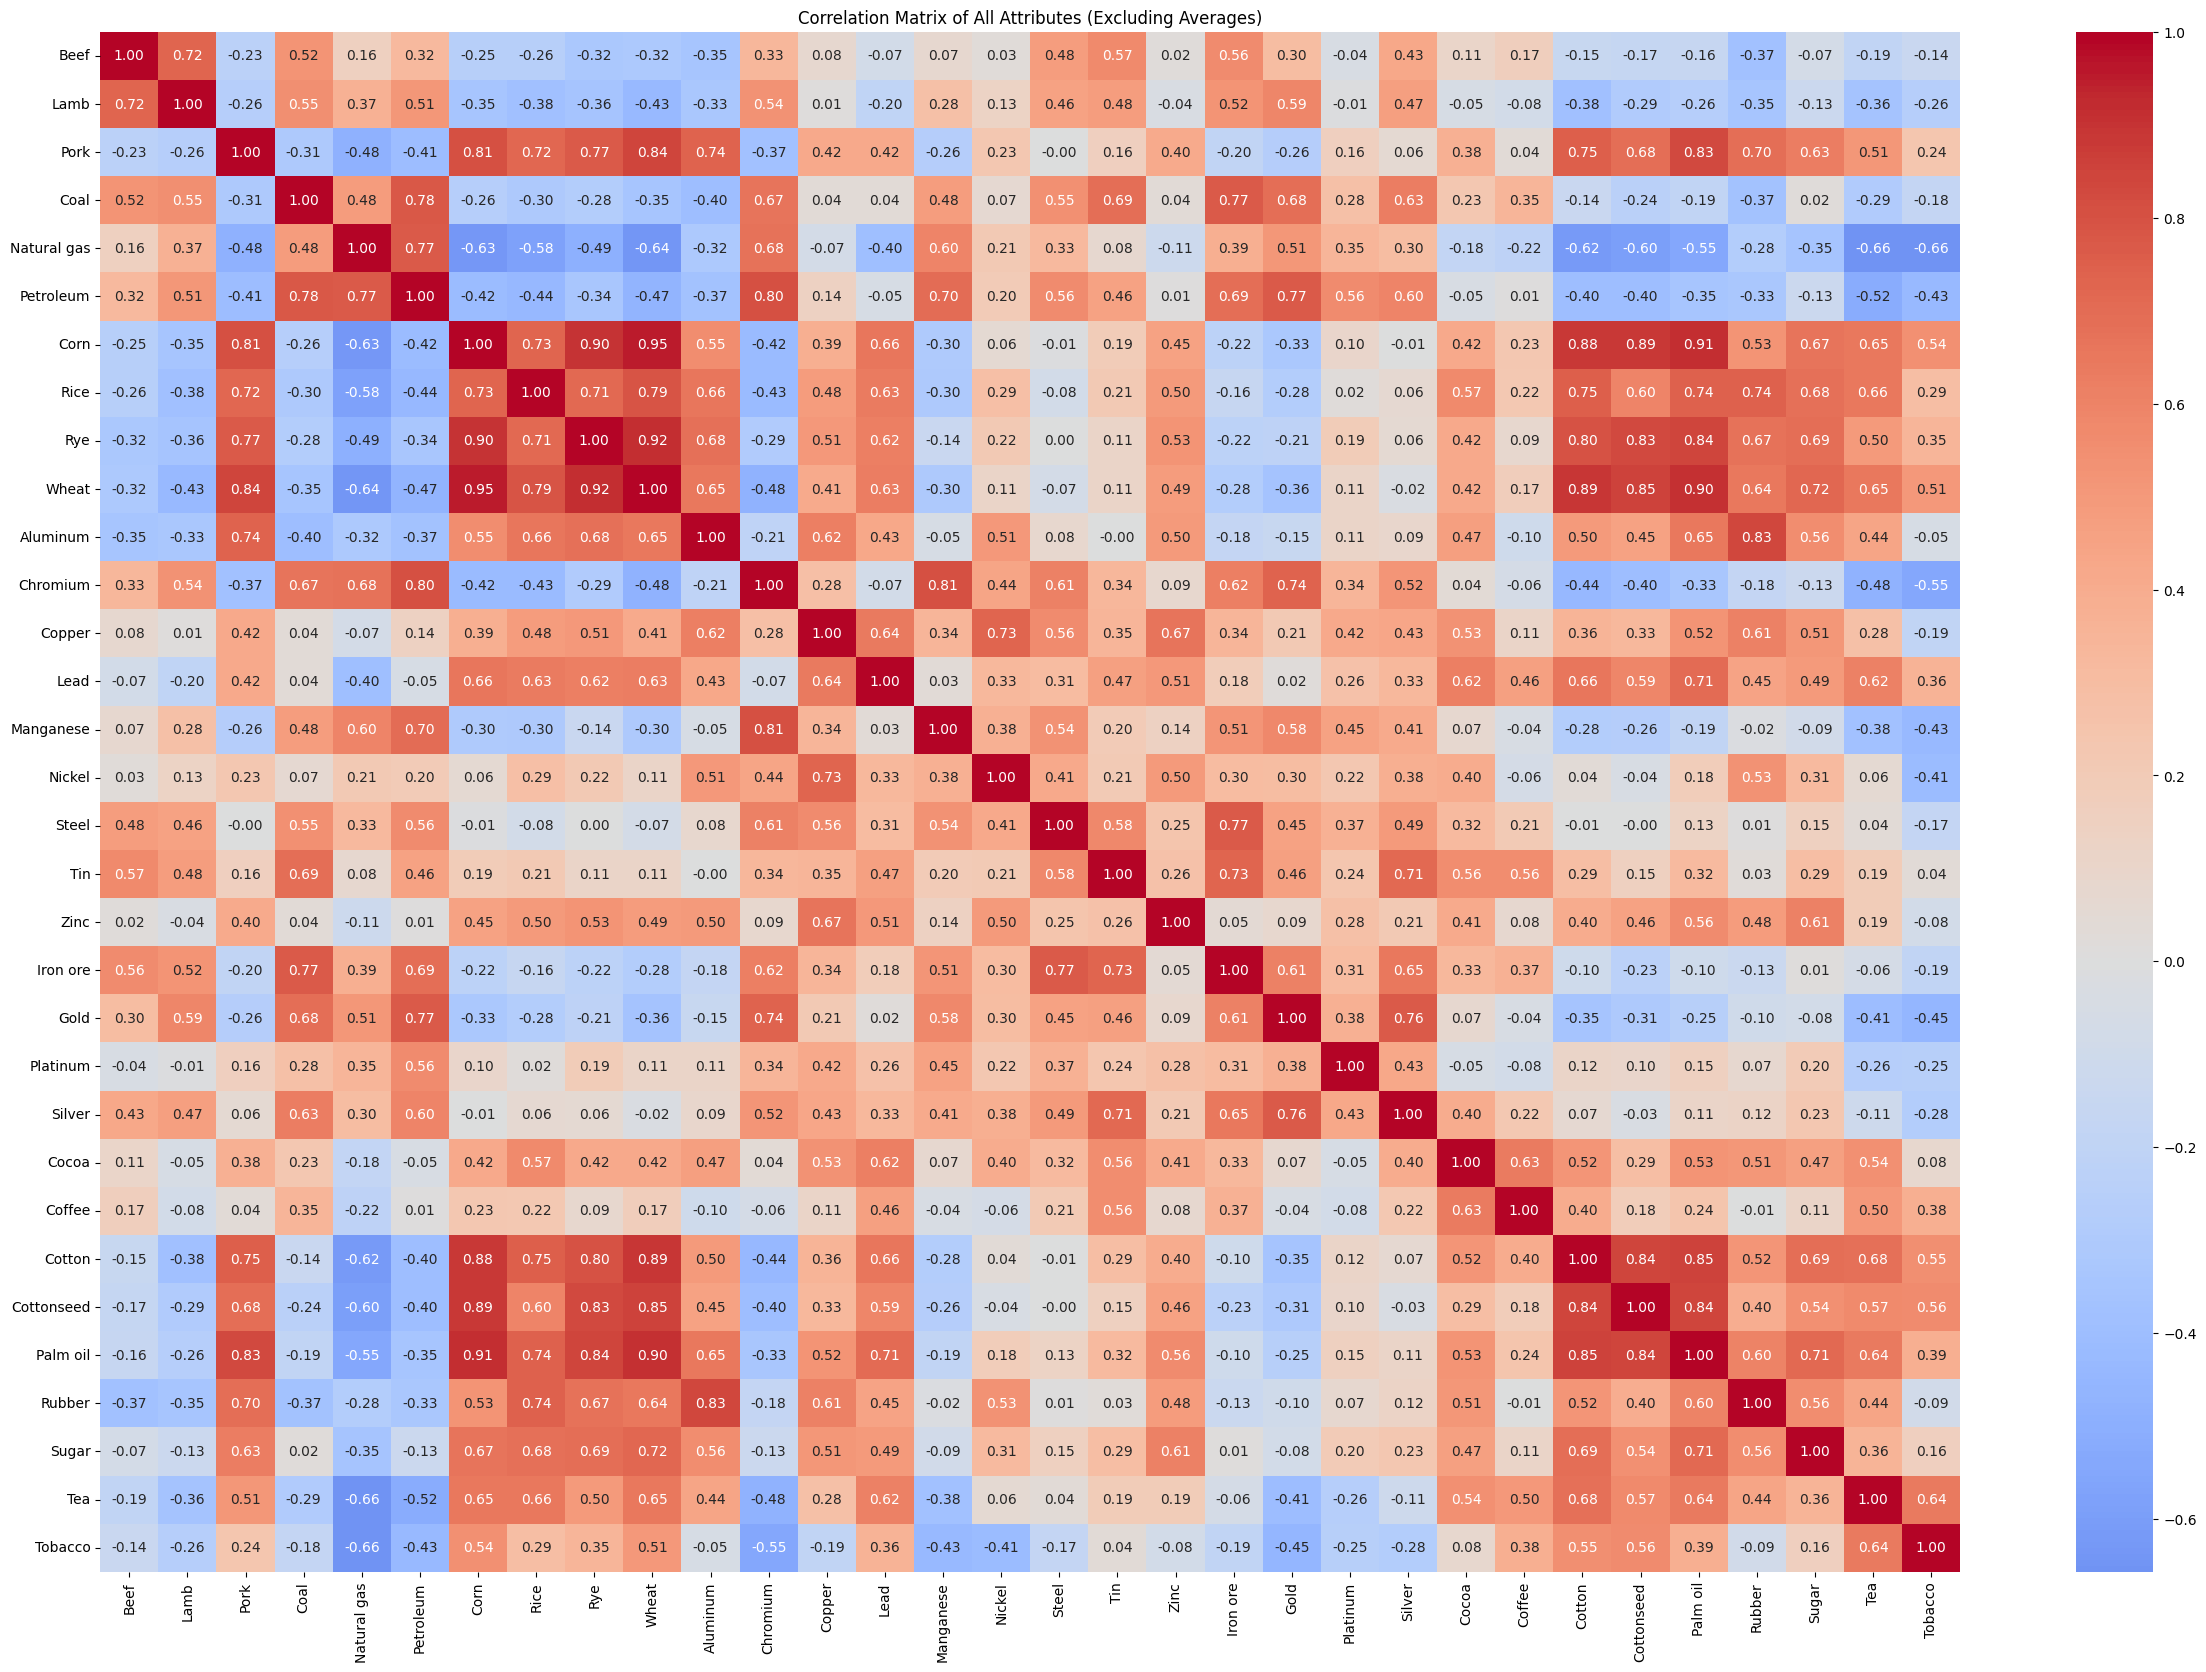

In [35]:
# Rename columns to single words
def rename_column(col):
    if 'Data.Meat' in col:
        return col.split('.')[-1]
    elif 'Data.Fuel' in col:
        return col.split('.')[-1]
    elif 'Data.Grain' in col:
        return col.split('.')[-1]
    elif 'Data.Metal' in col:
        return col.split('.')[-1]
    elif 'Data.Plant' in col:
        return col.split('.')[-1]
    return col

# Apply the renaming function to all columns
df_cp.columns = [rename_column(col) for col in df_cp.columns]

# Remove 'Average' columns before calculating correlation
df_cp_no_avg = df_cp.loc[:, ~df_cp.columns.str.endswith('Average')]

# Calculate the correlation matrix (without 'Average' columns)
correlation_matrix = df_cp_no_avg.corr()

# Identify positive and negative correlations
positive_corr = correlation_matrix[correlation_matrix > 0.5]  # Strong positive correlations (> 0.5)
negative_corr = correlation_matrix[correlation_matrix < -0.5]  # Strong negative correlations (< -0.5)

# Visualize the correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Correlation Matrix of All Attributes (Excluding Averages)")
plt.show()

**Based on the heatmap, we can assert the following:**

*Strong Positive Correlations:*
* Grains: Corn, Rice, and Wheat exhibit strong positive correlations with each other, indicating that their prices tend to move together.
* Metals: Several metals show strong positive correlations, suggesting common factors influencing their prices. For instance, Aluminum and Copper, Lead and Zinc, etc.

*Strong Negative Correlations:*
* Limited instances: There are fewer instances of strong negative correlations compared to positive correlations.
* Gold and some metals: Gold generally shows negative correlations with some other metals, suggesting it tends to move in the opposite direction to those metals.


**Predominance of positive correlations: The heatmap reveals a greater number of positive correlations than negative correlations, indicating a general trend of attributes moving together in the dataset.**
* Clustering of correlations: Certain groups of attributes, such as grains and metals, display stronger correlations within their respective groups, suggesting common underlying factors affecting their prices.

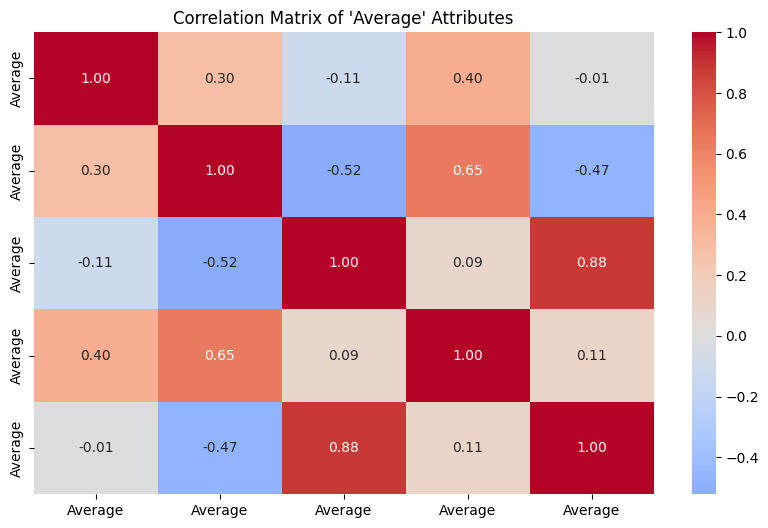

In [36]:
# Rename columns to single words (if not already done)
def rename_column(col):
    if 'Data.Meat' in col:
        return col.split('.')[-1]
    elif 'Data.Fuel' in col:
        return col.split('.')[-1]
    elif 'Data.Grain' in col:
        return col.split('.')[-1]
    elif 'Data.Metal' in col:
        return col.split('.')[-1]
    elif 'Data.Plant' in col:
        return col.split('.')[-1]
    return col

df_cp.columns = [rename_column(col) for col in df_cp.columns]

# Select only columns ending with 'Average'
df_cp_avg = df_cp.loc[:, df_cp.columns.str.endswith('Average')]

# Calculate the correlation matrix for 'Average' columns
correlation_matrix_avg = df_cp_avg.corr()

# Visualize the correlation matrix for 'Average' columns
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix_avg, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Correlation Matrix of 'Average' Attributes")
plt.show()

**Based on the heatmap showing correlations between 'Average' attributes, we can assert the following:**

*Strong Positive Correlations:*
 - Plant Average and Grain Average: There is a strong positive correlation (0.88) between the average prices of plants and grains, suggesting that these two categories tend to move together in the market.
 - Fuel Average and Metal Average: A strong positive correlation (0.65) exists between the average prices of fuel and metals, indicating a tendency for these categories to experience similar price movements.

*Moderate Positive Correlations:*
 - Meat Average and fuel Average: A moderate positive correlation (0.30) is observed between the average prices of meat and fuel.

*Weak Negative Correlations:*
- Meat Average and Grain Average: There is a weak negative correlation (-0.11) between the average prices of meat and grain. This suggests a slight tendency for meat prices to decrease when grain prices increase, and vice versa. However, the correlation is weak, indicating that other factors might play a more significant role in their price movements.


> The heatmap indicates a general trend of positive correlations among the average prices of different commodity categories. This suggests that there are common underlying factors influencing the overall price trends in these markets. The strong positive correlations between Plant/Grain and Fuel/Metal averages might indicate a closer relationship between these pairs of categories compared to others.





# **Part 2: A dataset related to the Calgary Crimes dataset**

1. Problem Definition
To create statistical visualizations and exploratory data analysis (EDA)

2. Data
A ".csv" file was given

Dataset 2: https://data.calgary.ca/Transportation-Transit/Traffic-Incidents/35ra-9556/about_data

3. Evalution
To use statistical analysis to check:
* How does the frequency of incidents differ based on the neighborhoods?
* How does the frequency of traffic incidents change based on the time of day?
* Are there any seasonal patterns in the frequency of incidents?


In [37]:
df_Traffic = pd.read_csv("drive/MyDrive/Colab Notebooks/ICT779/Traffic_Incidents_20240815.csv",
                    parse_dates=["START_DT", "MODIFIED_DT"])

In [38]:
df_Traffic.head()

,INCIDENT INFO,DESCRIPTION,START_DT,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point
0,Westbound 16 Avenue at Deerfoot Trail NE,Stalled vehicle. Partially blocking the right...,2022-06-21 07:31:40,2022-06-21 07:33:16,NE,-114.026687,51.067485,1,2022-06-21T07:31:4051.067485129276236-114.0266...,POINT (-114.02668672232672 51.067485129276236)
1,11 Avenue and 4 Street SW,Traffic incident. Blocking multiple lanes,2022-06-21 04:02:11,2022-06-21 04:12:38,SW,-114.071481,51.042624,1,2022-06-21T04:02:1151.04262449261462-114.07148...,POINT (-114.07148057660925 51.04262449261462)
2,68 Street and Memorial Drive E,Traffic incident.,2022-06-20 23:53:08,2022-06-20 23:55:42,NE,-113.935553,51.052474,1,2022-06-20T23:53:0851.0524735056658-113.935553...,POINT (-113.935553325751 51.0524735056658)
3,Eastbound 16 Avenue and 36 Street NE,Traffic incident. Blocking the left shoulder,2022-06-20 16:43:21,2022-06-20 17:17:05,NE,-113.989219,51.067086,1,2022-06-20T16:43:2151.06708565896752-113.98921...,POINT (-113.98921905311566 51.06708565896752)
4,Barlow Trail and 61 Avenue SE,Traffic incident.,2022-06-20 16:42:12,2022-06-20 17:28:21,SE,-113.985727,50.998727,1,2022-06-20T16:42:1250.99872748477766-113.98572...,POINT (-113.98572655353505 50.99872748477766)


In [39]:
df_Traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48776 entries, 0 to 48775
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   INCIDENT INFO  48776 non-null  object        
 1   DESCRIPTION    48774 non-null  object        
 2   START_DT       48776 non-null  datetime64[ns]
 3   MODIFIED_DT    34719 non-null  datetime64[ns]
 4   QUADRANT       34717 non-null  object        
 5   Longitude      48776 non-null  float64       
 6   Latitude       48776 non-null  float64       
 7   Count          48776 non-null  int64         
 8   id             48776 non-null  object        
 9   Point          48776 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 3.7+ MB


In [40]:
# Sort DataFrame in date order
df_Traffic.sort_values(by=["START_DT"], inplace=True, ascending=True)
df_Traffic.START_DT.head()


,START_DT
11200,2016-12-06 10:00:00
21963,2016-12-06 14:36:00
13745,2016-12-06 16:25:00
37400,2016-12-06 16:26:00
37057,2016-12-06 17:05:00


In [41]:
df_Traffic.head()

,INCIDENT INFO,DESCRIPTION,START_DT,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point
11200,Eastbound McKnight Boulevard at 2 Street NW,Multi vehicle incident.,2016-12-06 10:00:00,2016-12-06 10:01:00,NW,-114.064987,51.096111,1,2016-12-06T10:00:0051.09611149-114.0649874,POINT (-114.0649874 51.09611149)
21963,Eastbound Memorial Drive approaching Deerfoot ...,2 vehicle incident blocking the middle lane.,2016-12-06 14:36:00,2016-12-06 14:42:00,NE,-114.020548,51.047634,1,2016-12-06T14:36:0051.0476343-114.0205479,POINT (-114.0205479 51.0476343)
13745,Macleod Trail at 9 Avenue SE,2 vehicle incident.,2016-12-06 16:25:00,2016-12-06 16:26:00,SE,-114.058178,51.044471,1,2016-12-06T16:25:0051.04447099-114.0581785,POINT (-114.0581785 51.04447099)
37400,Ogden Road at Bonnybrook Road SE,2 vehicle incident.,2016-12-06 16:26:00,2016-12-06 16:38:00,SE,-114.030872,51.028393,1,2016-12-06T16:26:0051.02839263-114.0308717,POINT (-114.0308717 51.02839263)
37057,Southbound University Drive at Crowchild Trail NW,2 vehicle incident.,2016-12-06 17:05:00,2016-12-06 17:10:00,NW,-114.119584,51.066391,1,2016-12-06T17:05:0051.06639113-114.1195835,POINT (-114.1195835 51.06639113)


In [42]:
# Add datetime parameters for Start_dt
df_Traffic["Start_Year"] = df_Traffic["START_DT"].dt.year
df_Traffic["Start_Month"] = df_Traffic["START_DT"].dt.month
df_Traffic["Start_Day"] = df_Traffic["START_DT"].dt.day
df_Traffic["Start_Hour"] = df_Traffic["START_DT"].dt.hour
df_Traffic["Start_Minute"] = df_Traffic["START_DT"].dt.minute
df_Traffic["Day_of_Week"] = df_Traffic["START_DT"].dt.dayofweek
df_Traffic["Day_of_Year"] = df_Traffic["START_DT"].dt.dayofyear
df_Traffic["Time_of_Day"] = df_Traffic["START_DT"].dt.time

df_Traffic.drop("START_DT", axis=1, inplace=True)

In [43]:
df_Traffic.head().T

,11200,21963,13745,37400,37057
INCIDENT INFO,Eastbound McKnight Boulevard at 2 Street NW,Eastbound Memorial Drive approaching Deerfoot ...,Macleod Trail at 9 Avenue SE,Ogden Road at Bonnybrook Road SE,Southbound University Drive at Crowchild Trail NW
DESCRIPTION,Multi vehicle incident.,2 vehicle incident blocking the middle lane.,2 vehicle incident.,2 vehicle incident.,2 vehicle incident.
MODIFIED_DT,2016-12-06 10:01:00,2016-12-06 14:42:00,2016-12-06 16:26:00,2016-12-06 16:38:00,2016-12-06 17:10:00
QUADRANT,NW,NE,SE,SE,NW
Longitude,-114.064987,-114.020548,-114.058178,-114.030872,-114.119584
Latitude,51.096111,51.047634,51.044471,51.028393,51.066391
Count,1,1,1,1,1
id,2016-12-06T10:00:0051.09611149-114.0649874,2016-12-06T14:36:0051.0476343-114.0205479,2016-12-06T16:25:0051.04447099-114.0581785,2016-12-06T16:26:0051.02839263-114.0308717,2016-12-06T17:05:0051.06639113-114.1195835
Point,POINT (-114.0649874 51.09611149),POINT (-114.0205479 51.0476343),POINT (-114.0581785 51.04447099),POINT (-114.0308717 51.02839263),POINT (-114.1195835 51.06639113)
Start_Year,2016,2016,2016,2016,2016


## **How does the frequecy of incidents differ based on neighborhoods**

In [44]:
# Check the different values of incidents in different neighborhoods
df_Traffic["INCIDENT INFO"].value_counts()

,count
INCIDENT INFO,
Eastbound Glenmore Trail approaching 14 Street SW,129
Southbound Deerfoot Trail approaching Glenmore Trail SE,127
Southbound Deerfoot Trail approaching Glenmore Trail SE,89
Southbound Crowchild Trail approaching Glenmore Trail SW,87
Westbound Glenmore Trail approaching Crowchild Trail SW,68
...,...
Southbound 68 Street and Faldale Cl NE,1
Westbound Bow Trail after 14 Street SW,1
Northbound 14 Street and 64 Avenue NW,1


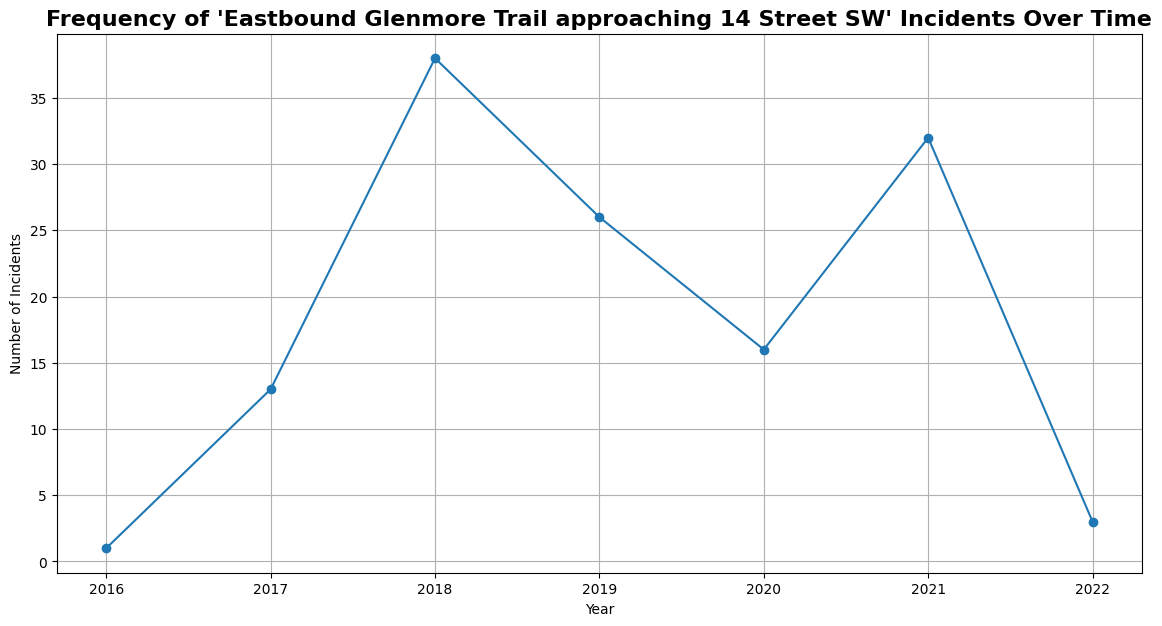

In [45]:
# Filter the DataFrame for the specific incident
df_Eastbound = df_Traffic[df_Traffic["INCIDENT INFO"] == "Eastbound Glenmore Trail approaching 14 Street SW"]

# Group the data by year and count the incidents
incidents_by_year = df_Eastbound.groupby("Start_Year")["INCIDENT INFO"].count()

# Plot the time series
plt.figure(figsize=(14, 7))
incidents_by_year.plot(kind='line', marker='o')
plt.title("Frequency of 'Eastbound Glenmore Trail approaching 14 Street SW' Incidents Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.show()


#### Question 1: How does the frequency of incidents differ based on the neighborhoods?

***Let's plot the histogram for the first top ten Neighborhoods with incidents***

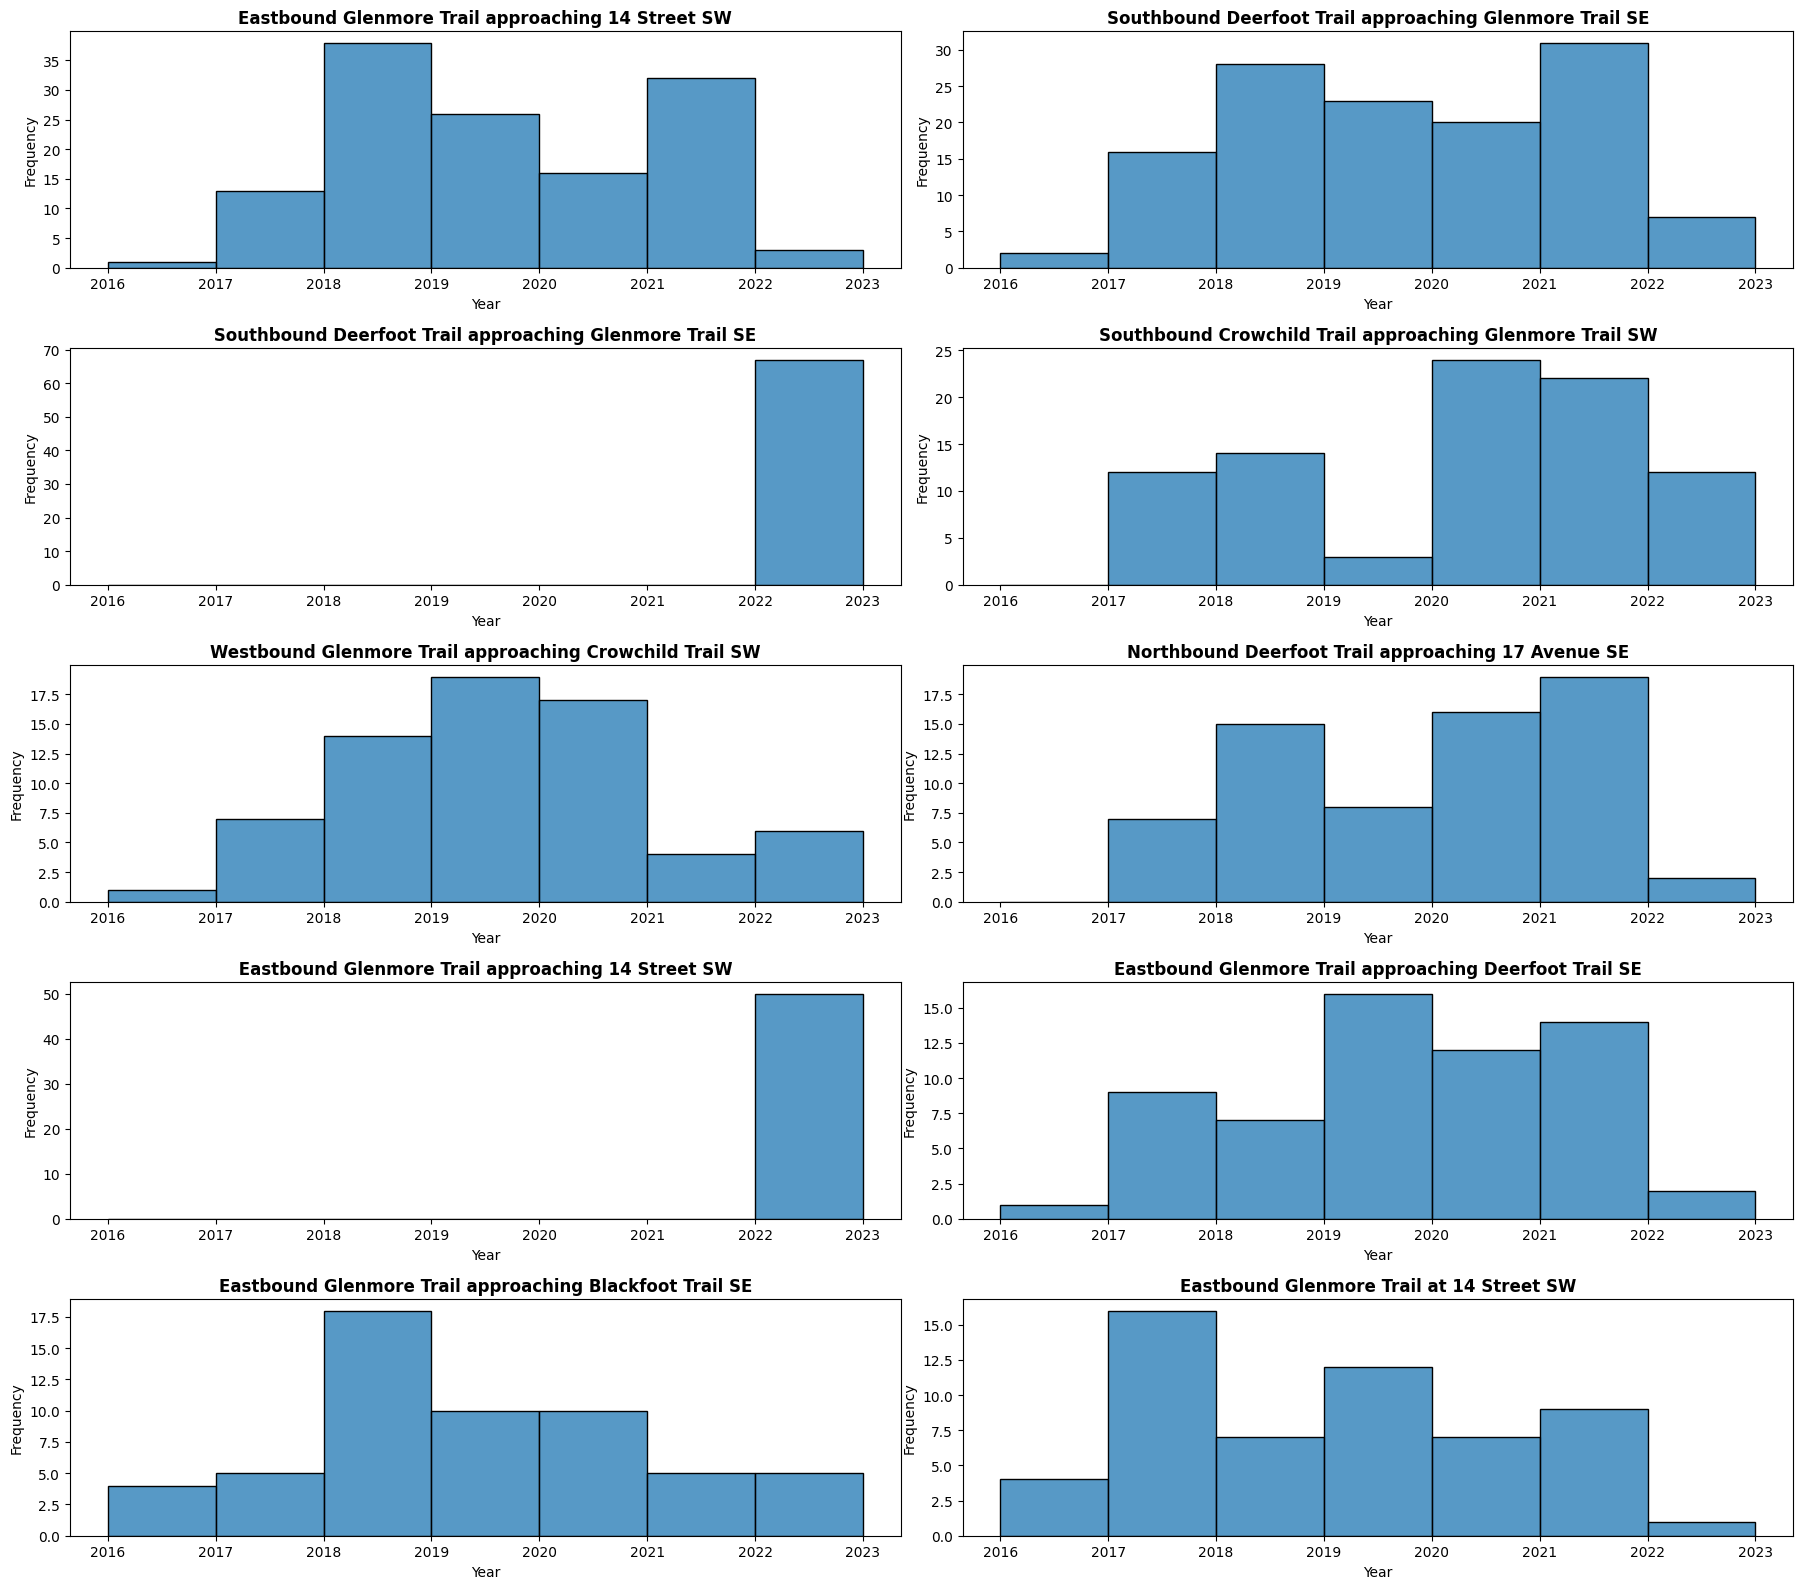

In [46]:
# Get the top 10 incident categories
top_10_incidents = df_Traffic["INCIDENT INFO"].value_counts().head(10).index

# Create subplots arranged in 5 rows and 2 columns
fig, axs = plt.subplots(5, 2, figsize=(18, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust the space between plots

# Plot histograms for each of the top 10 incident categories
for i, incident in enumerate(top_10_incidents):
    row = i // 2  # Determine the row index
    col = i % 2   # Determine the column index
    # Use integer bin edges for whole years
    sns.histplot(df_Traffic[df_Traffic["INCIDENT INFO"] == incident]["Start_Year"], bins=range(2016, 2024), kde=False, ax=axs[row, col])
    axs[row, col].set_title(f'{incident}', fontweight='bold')
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Frequency')
    # Set x-axis ticks to be whole years
    axs[row, col].set_xticks(range(2016, 2024))

# Hide any empty subplots (if any)
for j in range(len(top_10_incidents), 5 * 2):
    fig.delaxes(axs.flatten()[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


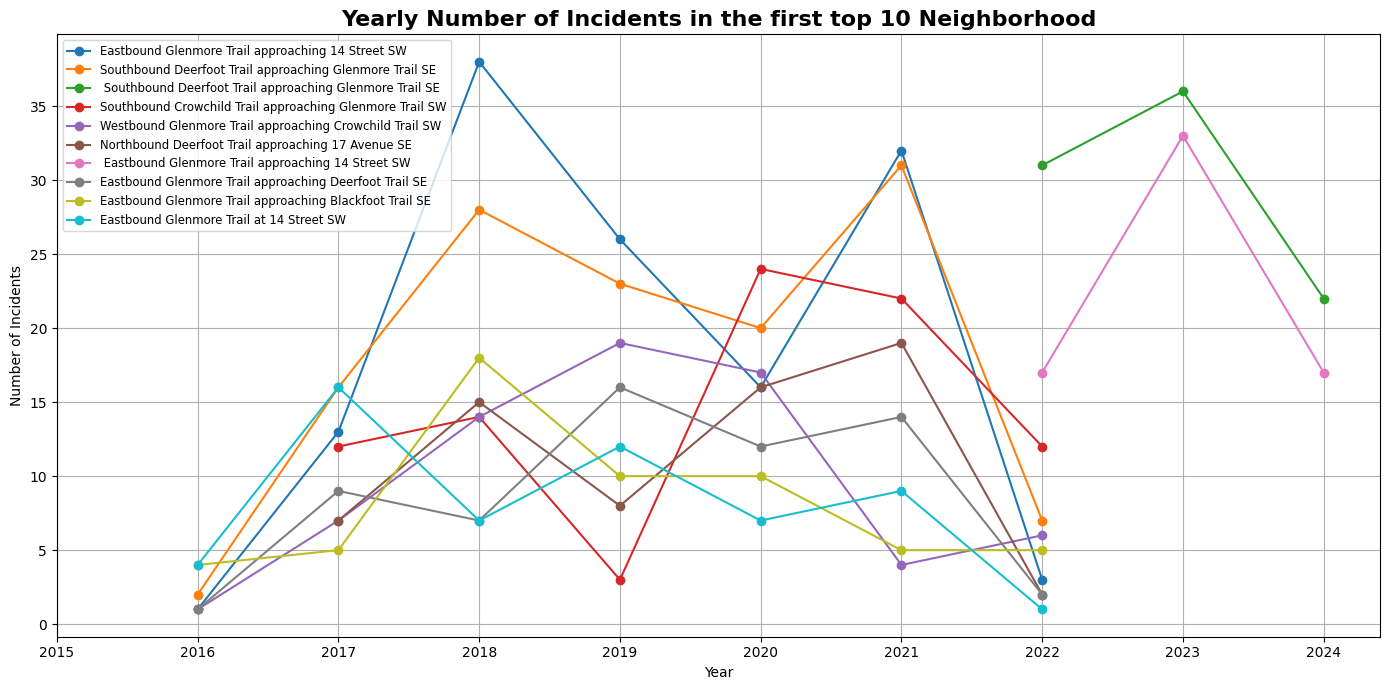

In [47]:
# Create a figure for the time series plot
plt.figure(figsize=(14, 7))

# Plot time series for each of the top 10 incident categories
for incident in top_10_incidents:
    yearly_count = df_Traffic[df_Traffic["INCIDENT INFO"] == incident]["Start_Year"].value_counts().sort_index()
    plt.plot(yearly_count.index, yearly_count.values, marker='o', label=incident)

# Customize the plot
plt.title('Yearly Number of Incidents in the first top 10 Neighborhood', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(range(2015, 2025))
plt.legend(fontsize='small')
plt.tight_layout()

# Show the plot
plt.show()

INCIDENT INFO
Eastbound Glenmore Trail approaching 14 Street SW            129
Southbound Deerfoot Trail approaching Glenmore Trail SE      127
 Southbound Deerfoot Trail approaching Glenmore Trail SE      89
Southbound Crowchild Trail approaching Glenmore Trail SW      87
Westbound Glenmore Trail approaching Crowchild Trail SW       68
                                                            ... 
Westbound Stoney Trail at Country Hills Boulevard NW           1
Westbound Symons Valley Road and Stoney Trail NW               1
Westbound Trans Canada HI Way at Sarcee Trail NW               1
Westbound Trans Canada Hi and Bowfort Road NW                  1
Westbound Trans Canada Hi and Stoney Trail NW                  1
Name: INCIDENT INFO, Length: 20706, dtype: int64


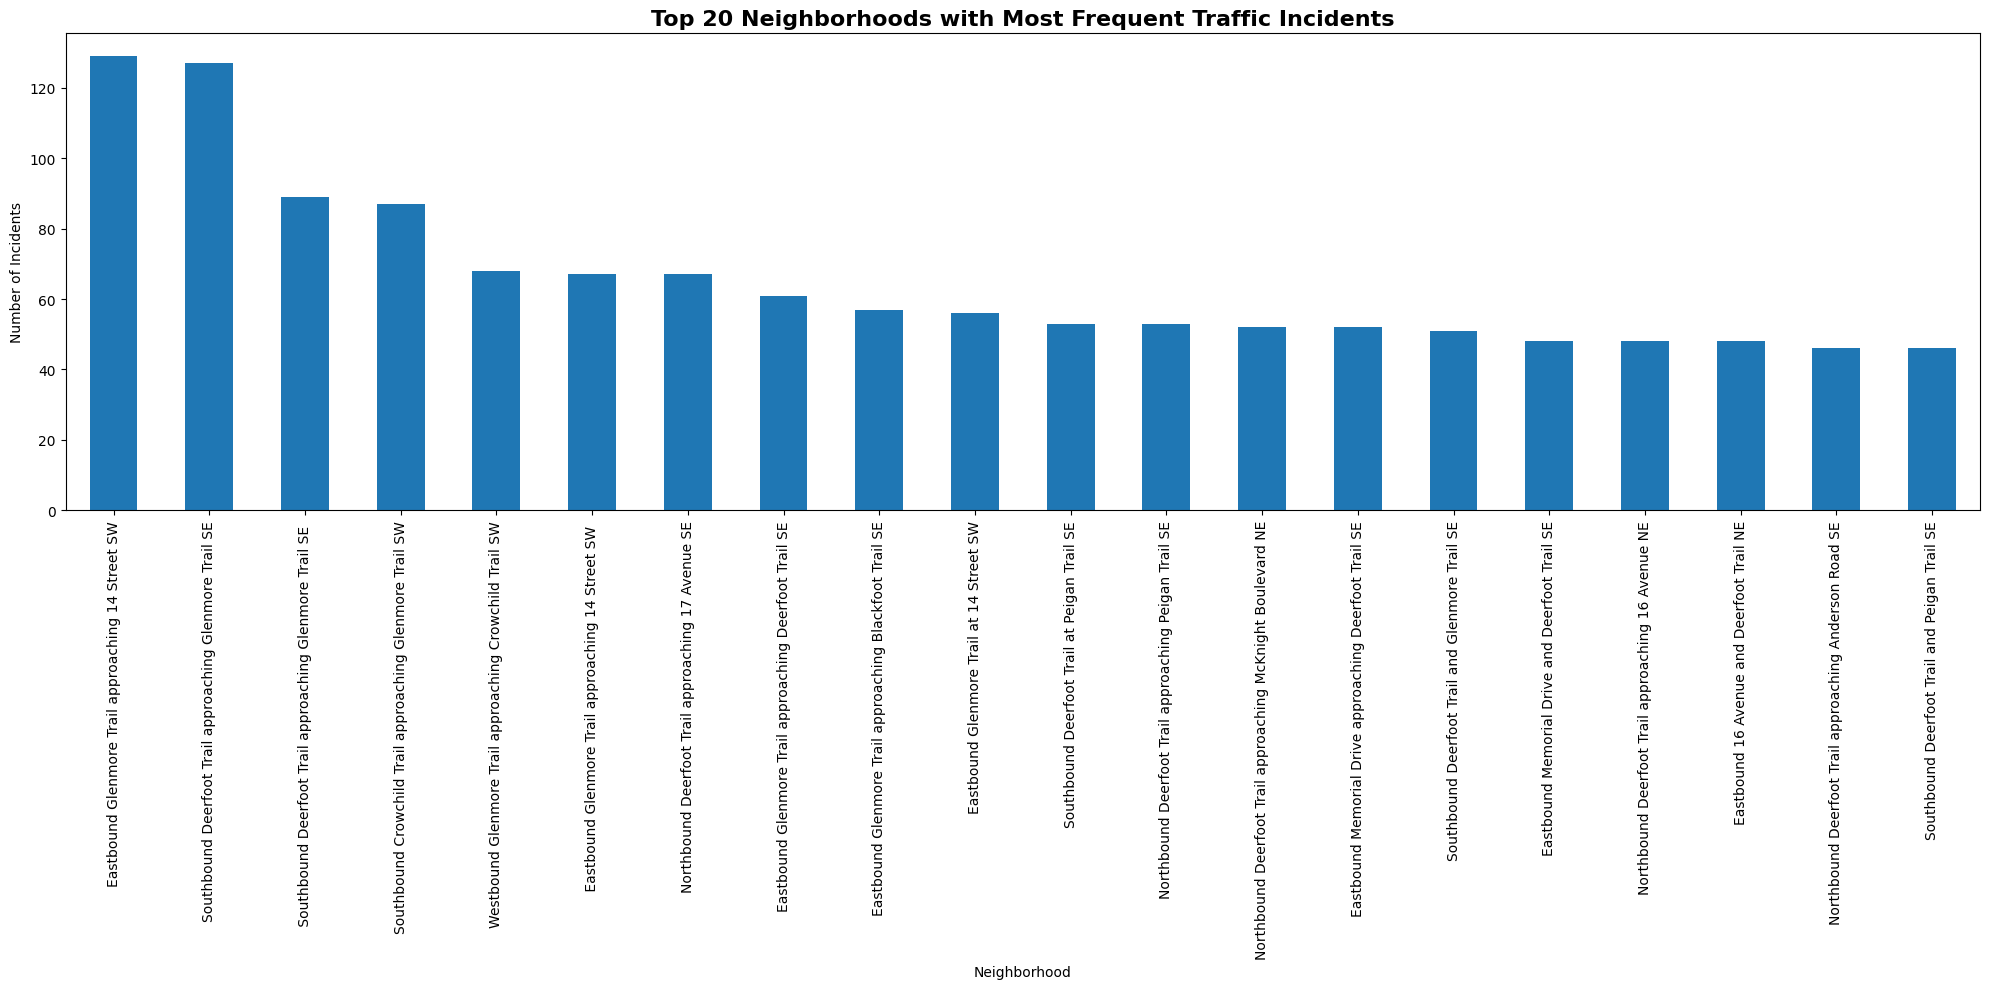

In [48]:
# Group incidents by neighborhood and count their frequency
incidents_by_neighborhood = df_Traffic.groupby("INCIDENT INFO")["INCIDENT INFO"].count().sort_values(ascending=False)

# Display the frequency of incidents for each neighborhood
print(incidents_by_neighborhood)

# Visualize the top N neighborhoods with the most incidents. Let start with the first 20 neighborhoods
top_n = 20
plt.figure(figsize=(20, 10))
incidents_by_neighborhood.head(top_n).plot(kind='bar')
plt.title(f"Top {top_n} Neighborhoods with Most Frequent Traffic Incidents", fontsize=16, fontweight='bold')
plt.xlabel("Neighborhood")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


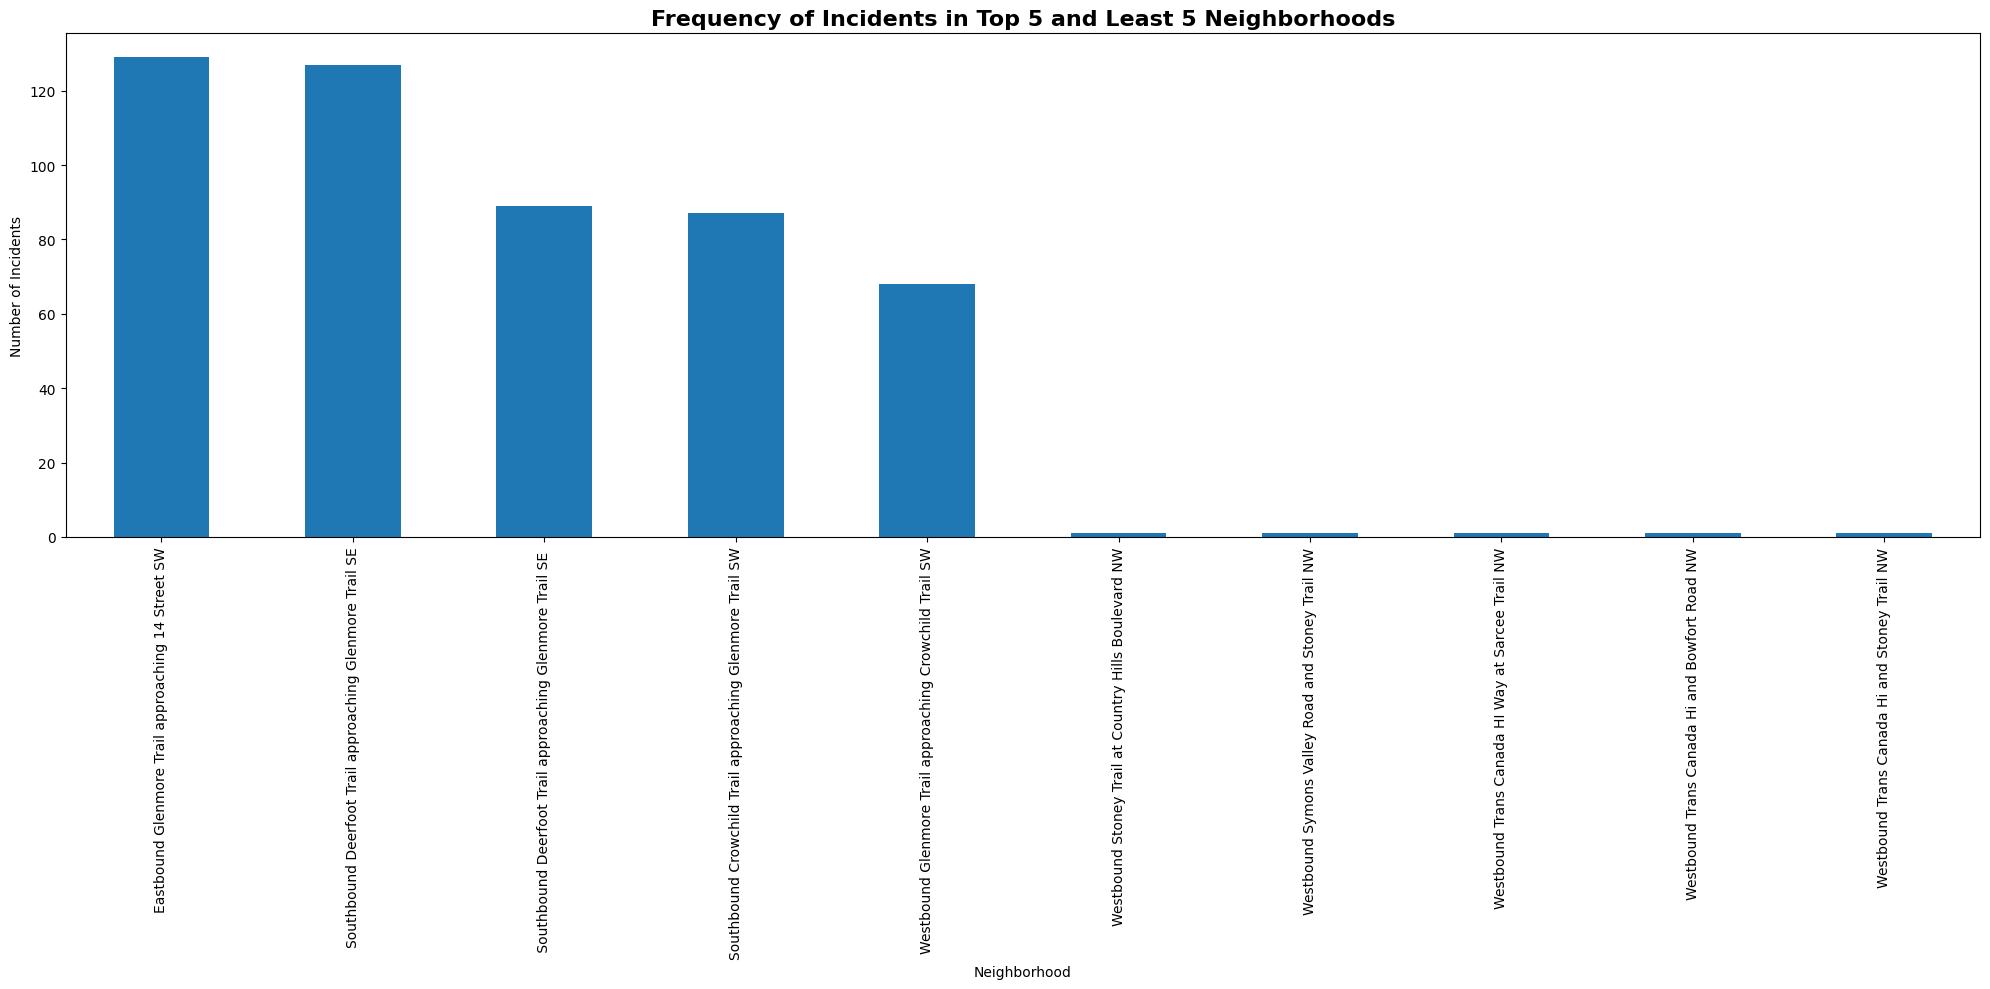

In [49]:
# Group incidents by neighborhood and count their frequency
incidents_by_neighborhood = df_Traffic.groupby("INCIDENT INFO")["INCIDENT INFO"].count().sort_values(ascending=False)

# Get the top 5 and least 5 neighborhoods
top_5_neighborhoods = incidents_by_neighborhood.head(5)
least_5_neighborhoods = incidents_by_neighborhood.tail(5)

# Combine the top and least neighborhoods into a single DataFrame
top_and_least_neighborhoods = pd.concat([top_5_neighborhoods, least_5_neighborhoods])

# Create a bar chart
plt.figure(figsize=(20, 10))
top_and_least_neighborhoods.plot(kind='bar')
plt.title("Frequency of Incidents in Top 5 and Least 5 Neighborhoods", fontsize=16, fontweight='bold')
plt.xlabel("Neighborhood")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


#### **Observations**

Some areas have higher traffic incidents while some aread have little or no traffic incident.

## Question 2: **How does the frequency of traffic incidents change based on the time of day?**

<ipython-input-50-90e3f8088b6b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Hour', y='Number of Incidents', data=hourly_incidents, palette='viridis')


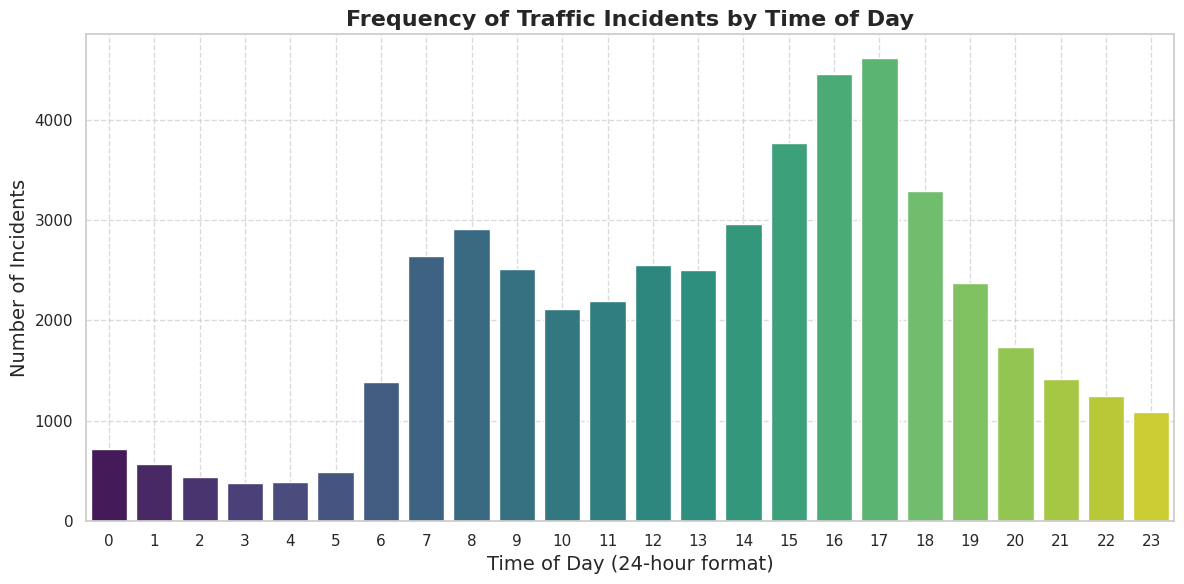

In [50]:
# Group incidents by hour of the day and count their frequency
hourly_incidents = df_Traffic.groupby('Start_Hour')['INCIDENT INFO'].count().reset_index()
hourly_incidents.columns = ['Hour', 'Number of Incidents']

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Hour', y='Number of Incidents', data=hourly_incidents, palette='viridis')

# Set plot titles and labels
plt.title('Frequency of Traffic Incidents by Time of Day', fontsize=16, fontweight='bold')
plt.xlabel('Time of Day (24-hour format)', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)

# Display the plot
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **Observations**

Between the 6th hour (6AM) and 18th hour (6PM), that was an increase in traffic although it decrease abit in the 9th (9AM) and 11th (11AM) hours and surges back up. The traffic bagan to reduce between 18th (6PM) hour and 23rd (11PM) hour. Between 24th (12AM) and 5th (5AM) hour, the traffic reduced.

## Question3: **Are there any seasonal patterns in the frequency of incidents?**

<ipython-input-51-6c900b28b4ad>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Month', y='Number of Incidents', data=monthly_incidents, palette='viridis')


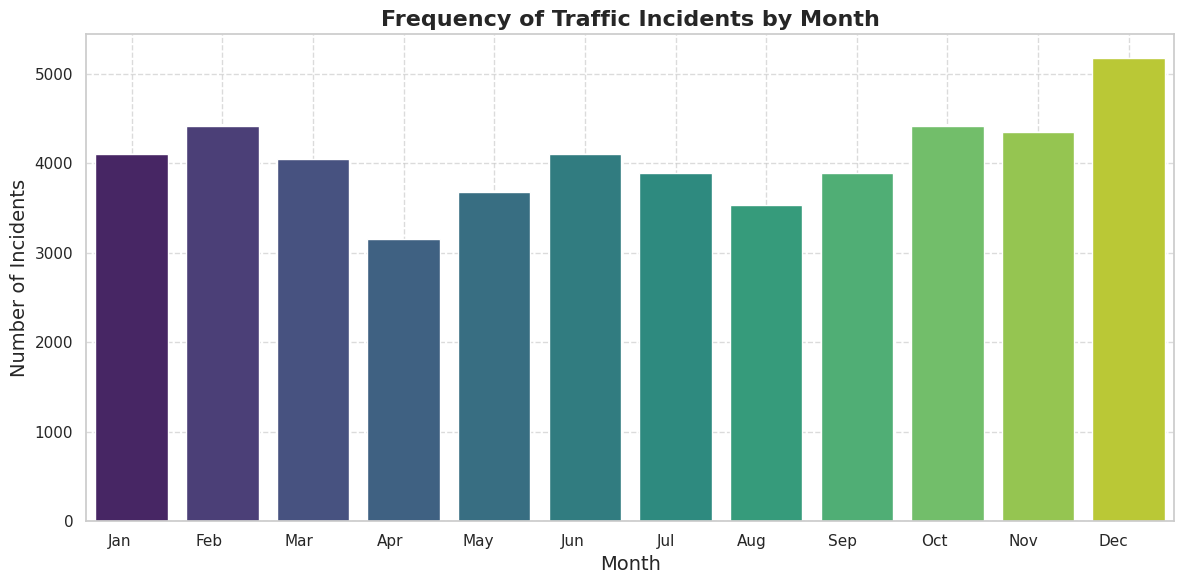

,Month,Number of Incidents
0,Jan,4106
1,Feb,4421
2,Mar,4048
3,Apr,3158
4,May,3677
5,Jun,4101
6,Jul,3896
7,Aug,3530
8,Sep,3887
9,Oct,4420


In [51]:
# Group incidents by month and count their frequency
monthly_incidents = df_Traffic.groupby('Start_Month')['INCIDENT INFO'].count().reset_index()
monthly_incidents.columns = ['Month', 'Number of Incidents']

# Replace month numbers with month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_incidents['Month'] = monthly_incidents['Month'].replace(range(1, 13), month_names)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Month', y='Number of Incidents', data=monthly_incidents, palette='viridis')

# Set plot titles and labels
plt.title('Frequency of Traffic Incidents by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Display the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the monthly incident counts for further analysis
monthly_incidents


**Based on the monthly incident frequency analysis, we observe the following seasonal patterns:**

- Peak Incident Months: The months of Jan, Feb, Mar, Jun, Oct, Nov and Dec consistently show the highest number of traffic incidents of over 4000. This could be attributed to increased travel and outdoor activities during these months.
- The rest are below 4000 traffic incidents. This could be due to factors like adverse weather conditions and reduced travel.
- Gradual Increase and Decrease: There appears to be a gradual increase in incidents from March to June, reaching a peak in the summer, followed by a gradual increase from September to December.
- Potential Contributing Factors: The observed seasonal patterns suggest that weather conditions, travel patterns, and outdoor activities play a significant role in influencing the frequency of traffic incidents.

<ipython-input-52-43d05f5424d7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Day of Week', y='Number of Incidents', data=hourly_incidents, palette='viridis')


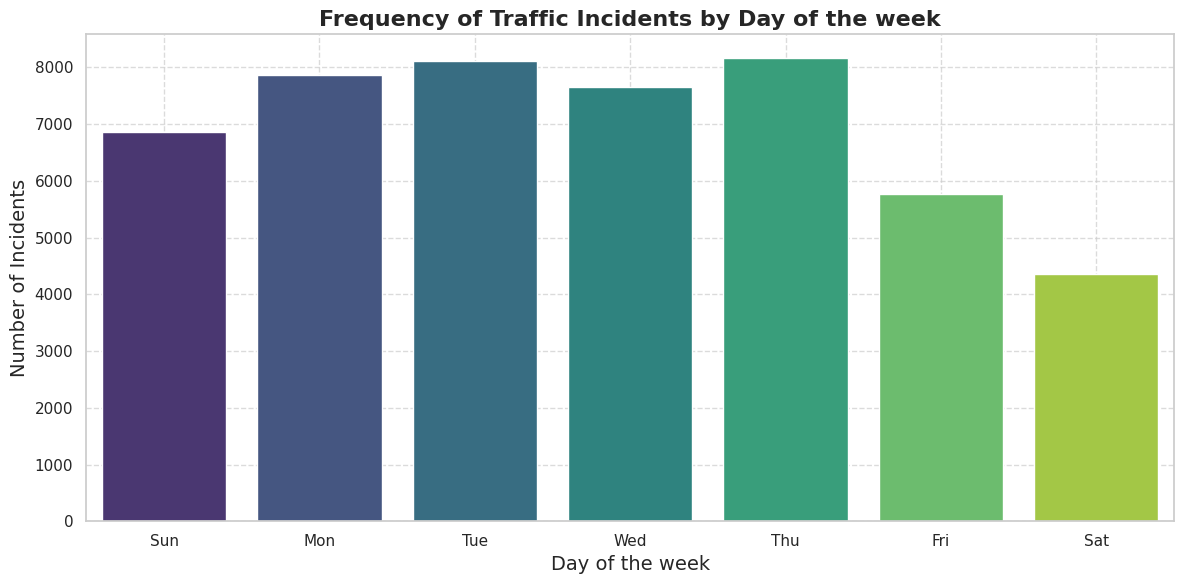

In [52]:
# Group incidents by Day of the week and count their frequency
hourly_incidents = df_Traffic.groupby('Day_of_Week')['INCIDENT INFO'].count().reset_index()
hourly_incidents.columns = ['Day of Week', 'Number of Incidents']

# Replace day numbers with day names
day_names = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
hourly_incidents['Day of Week'] = hourly_incidents['Day of Week'].replace(range(7), day_names) # Use replace to change day numbers to abbreviations

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Day of Week', y='Number of Incidents', data=hourly_incidents, palette='viridis')

# Set plot titles and labels
plt.title('Frequency of Traffic Incidents by Day of the week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)

# Display the plot
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observation**

Between Sunday to Thursday, there is higher traffic incident compared to Friday and Saturday